In [3]:
## import statements

import pandas as pd
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa as lb
import scipy as sp
import time 
import seaborn as sns
import os
import random
from sklearn.model_selection import train_test_split
from scipy import stats

%config InlineBackend.print_figure_kwargs = {'pad_inches':0}



In [2]:
def get_folder_names(directory_path):
    folder_names = []
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)
        if os.path.isdir(item_path):  # Check if the item is a directory
            folder_names.append(item)
    return folder_names
directory_path = "Data/genres_original/"
genres_list = get_folder_names(directory_path)
print(genres_list)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
def mean_median_sd( feature_array,feature_name ):
    feature_array = feature_array[~np.isnan(feature_array)]
    return {
        feature_name+'_mean' : np.mean(feature_array),
        feature_name+'_median' : np.median(feature_array),
        feature_name+'_std'  : np.std(feature_array)
    }

In [6]:
## Loading the audio file 
blues_001 = 'Data/genres_original/blues/blues.00039.wav'
audio_y, audio_sr = lb.load(blues_001,sr=22050)
ipd.Audio(blues_001)


In [7]:
color_codes = [
    "#FF5733",  # Red-Orange
    "#00BFFF",  # Deep Sky Blue
    "#FFD700",  # Gold
    "#008000",  # Green
    "#800080",  # Purple
    "#FF1493",  # Deep Pink
    "#FF4500",  # Orange Red
    "#8A2BE2",  # Blue Violet
    "#32CD32",  # Lime Green
    "#1E90FF",  # Dodger Blue
]


Text(0.5, 1.0, 'Blues_001 Waveplot')

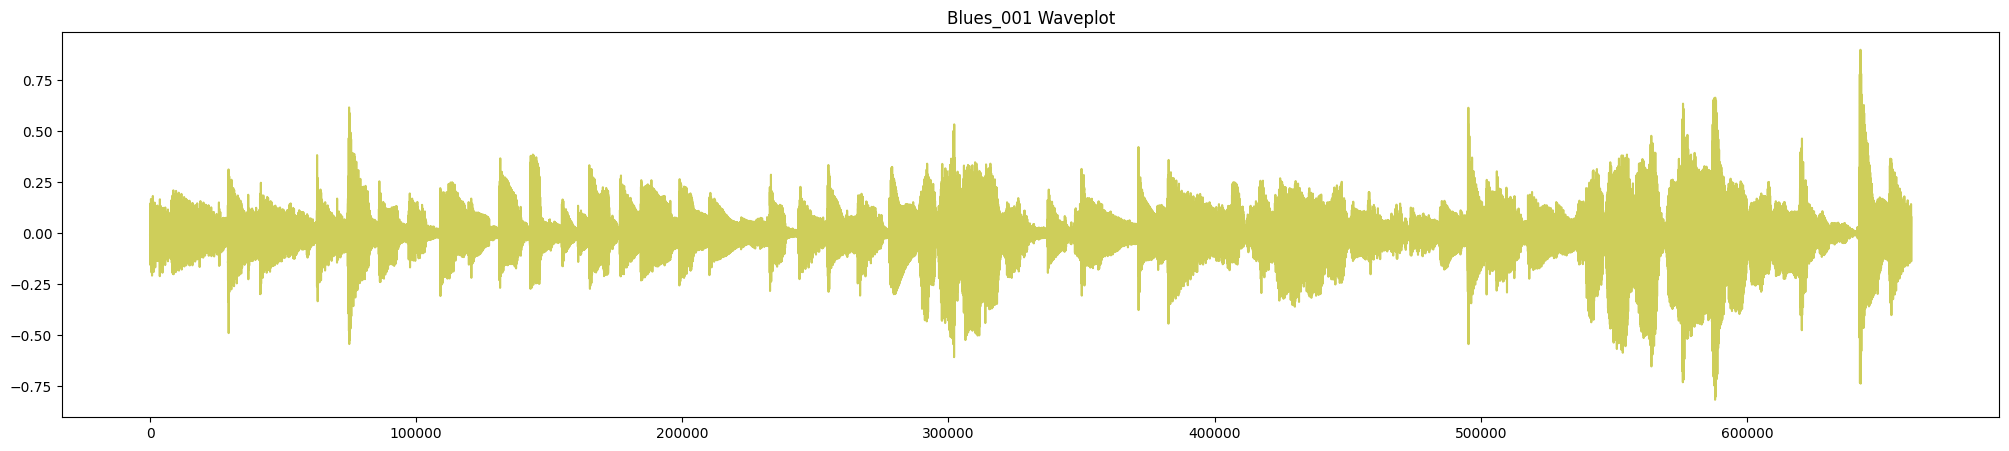

In [8]:
## Visualize the waveform 

plt.figure( figsize=(25,5) )
plt.plot( range(audio_y.size) , audio_y ,color='#CECE5A')
plt.title('Blues_001 Waveplot')


In [4]:
## Feature Extraction

# If an audio file has a length of 't' seconds 
# 'sample_rate(sr)' is the number of samples measured in one second
# therefore total samples = t*sr

# In our case 
# t = 30sec, sr= 22050, total samples = 661500 ( ~ 661794 )

## Calculating overall features in not that efficient therefore we divide the audio file into smaller lengths( frames )
## calculate features for these smaller lengths then take the summary statistic to get overall particular feature 

# frame/n_fft = the length of the sliding window  -- 1024
# hop_length = stride of the sliding window -- 512

# Number of smaller feature values = Total_samples/hop length = 661794/512 = 1293
# For every feature we have an array of length 1293, for each feature we calculate the mean, median and standard deviation

frame_size = 1048
hop_size = 512
split_freq = 2000
sr = 22050
contrast_bands = 6
n_mfcc_coeeficients = 13

In [10]:
## TIME DOMAIN FEATURES
## Here the x axis is usually the time/samples

Text(0.5, 1.0, 'Blues_001 Waveplot with Amplitude Envelope')

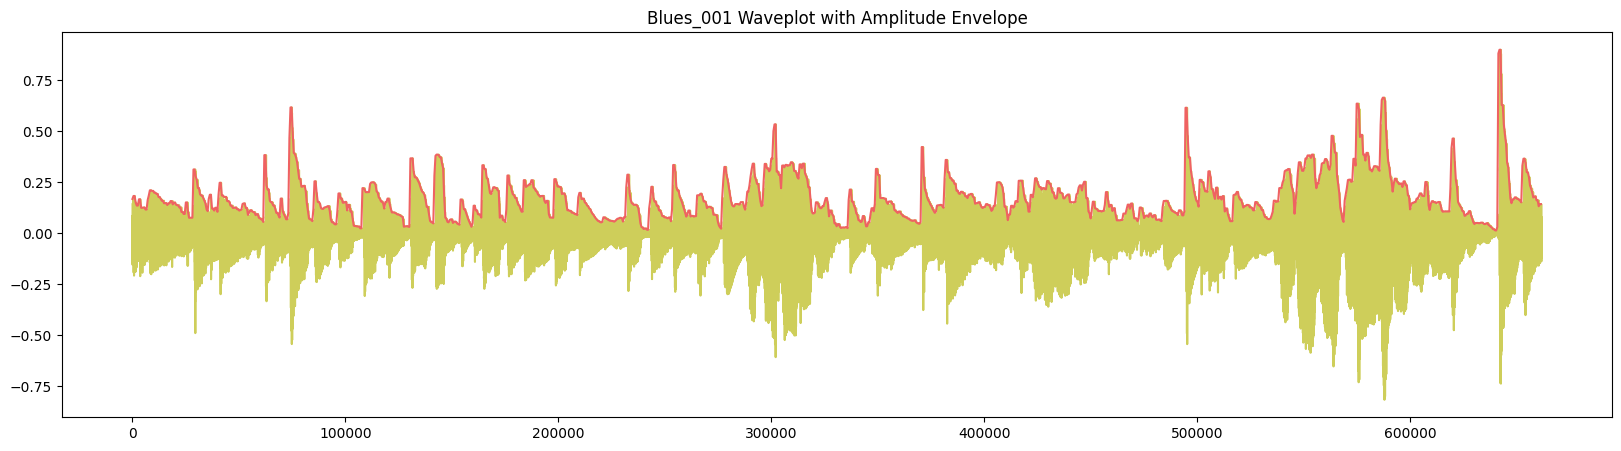

In [11]:
## Amplitude Envelope(AE)
## Max amplitude in the given frame 

def amplitude_envelope( audio, frame_size, hop_size ):
    return np.array( [max( audio[i:i+frame_size]) for i in range(0,audio.size,hop_size)] )

ae = amplitude_envelope(audio_y,frame_size ,hop_size)

plt.figure( figsize=(20,5) )
plt.plot( range(audio_y.size) , audio_y ,color='#CECE5A')
plt.plot( range( 0,audio_y.size,hop_size),ae ,color='#EF6262' )
plt.title('Blues_001 Waveplot with Amplitude Envelope')



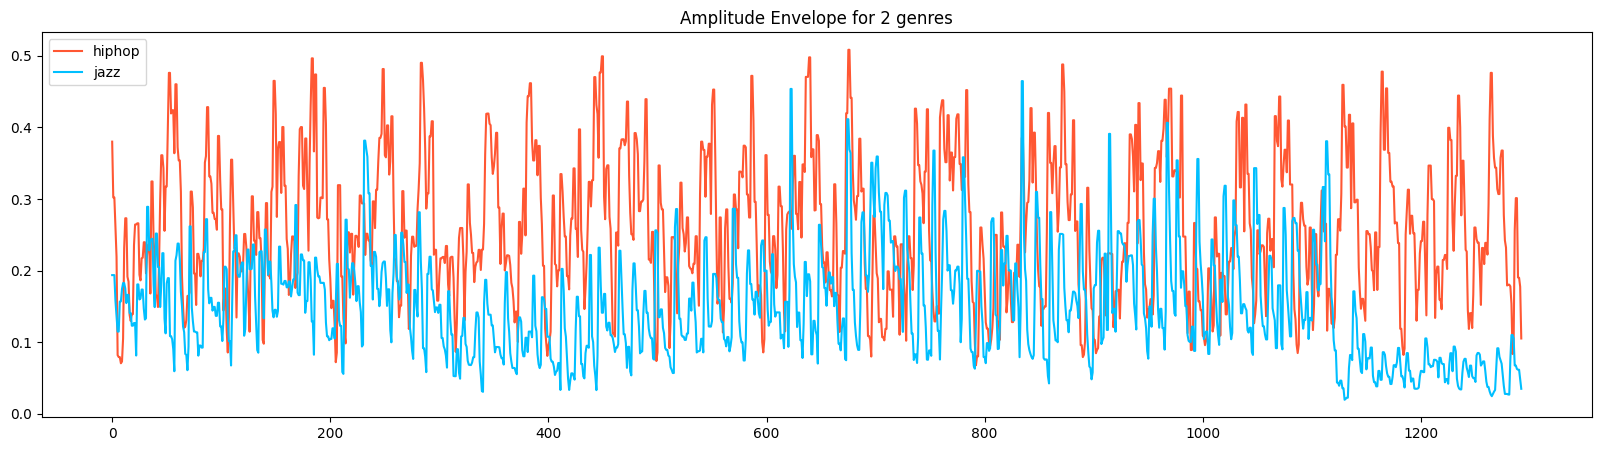

In [10]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    ae = amplitude_envelope(audio_y,frame_size,hop_size)
    plt.plot( range( 0,len(ae)),ae ,color=color_codes[j] )
    j+=1
plt.title('Amplitude Envelope for 2 genres')
plt.legend(random_genres)

Text(0.5, 1.0, 'Blues_001 Waveplot with RMS Energy')

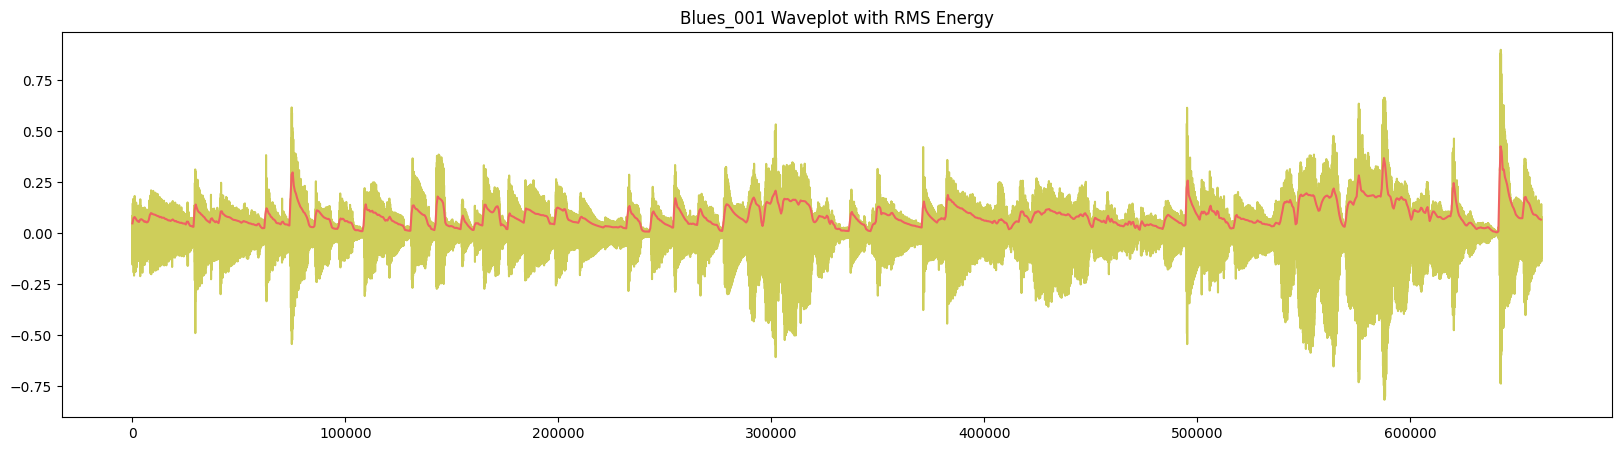

In [14]:
## RMS Energy

rms = lb.feature.rms(y=audio_y,frame_length=frame_size,hop_length=hop_size )[0]

plt.figure( figsize=(20,5) )
plt.plot( range(audio_y.size) ,audio_y ,color='#CECE5A')
plt.plot( range(0,audio_y.size,hop_size), rms ,color='#EF6262' )
plt.title('Blues_001 Waveplot with RMS Energy')



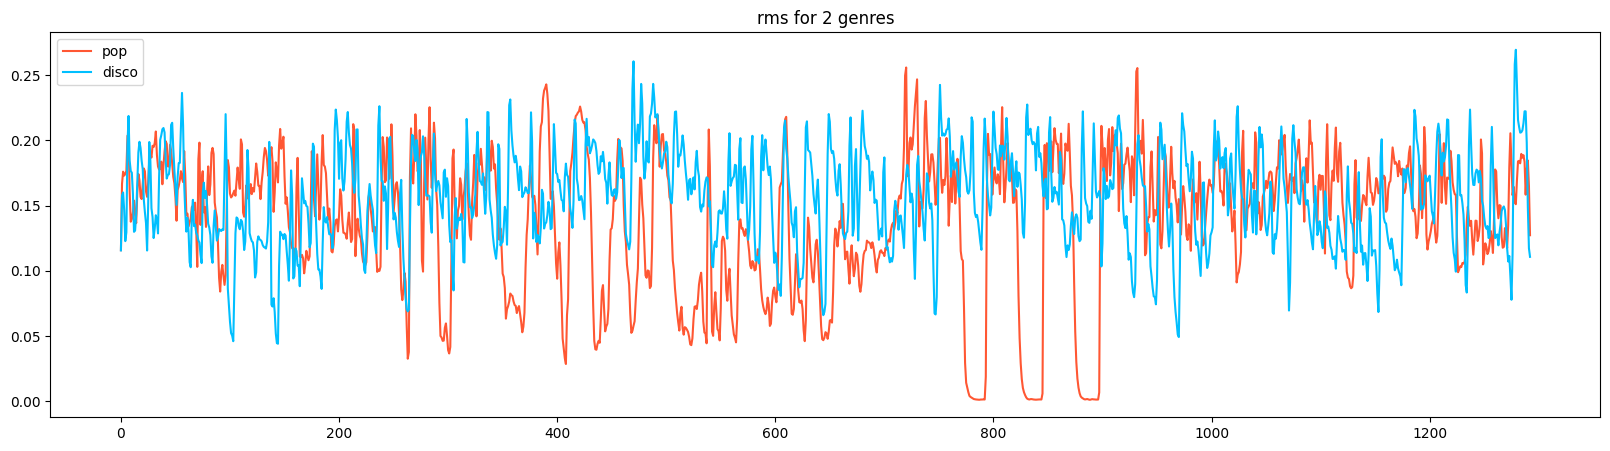

In [15]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    rms = lb.feature.rms(y=audio_y,frame_length=frame_size,hop_length=hop_size )[0]
    plt.plot( range( 0,len(rms)),rms ,color=color_codes[j] )
    j+=1
plt.title('rms for 2 genres')
plt.legend(random_genres)

Text(0.5, 1.0, 'Blues_001 ZCR Plot')

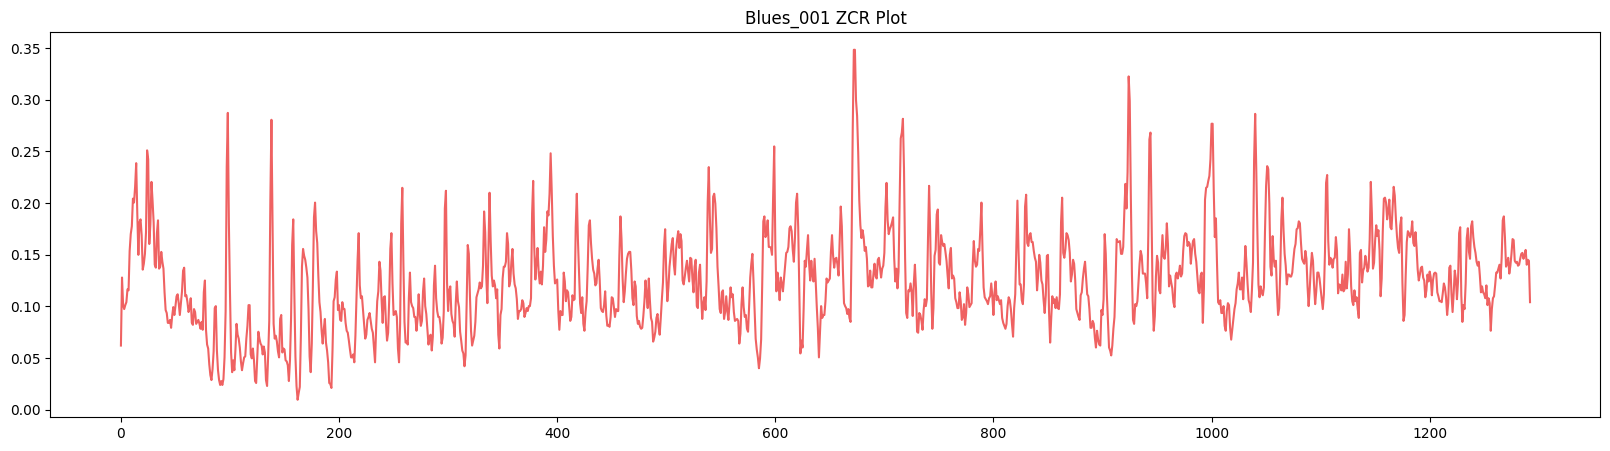

In [16]:
## Zero Crossing Rate(ZCR)
## zero_crossings = Number of times sign changes, 
## zero_crossing_rate = zero_Crossing/n_fft

zcr = lb.feature.zero_crossing_rate(audio_y,frame_length=frame_size,hop_length=hop_size)[0]

plt.figure( figsize=(20,5) )
plt.plot( range(len(zcr)),zcr ,color='#EF6262' )
plt.title('Blues_001 ZCR Plot')


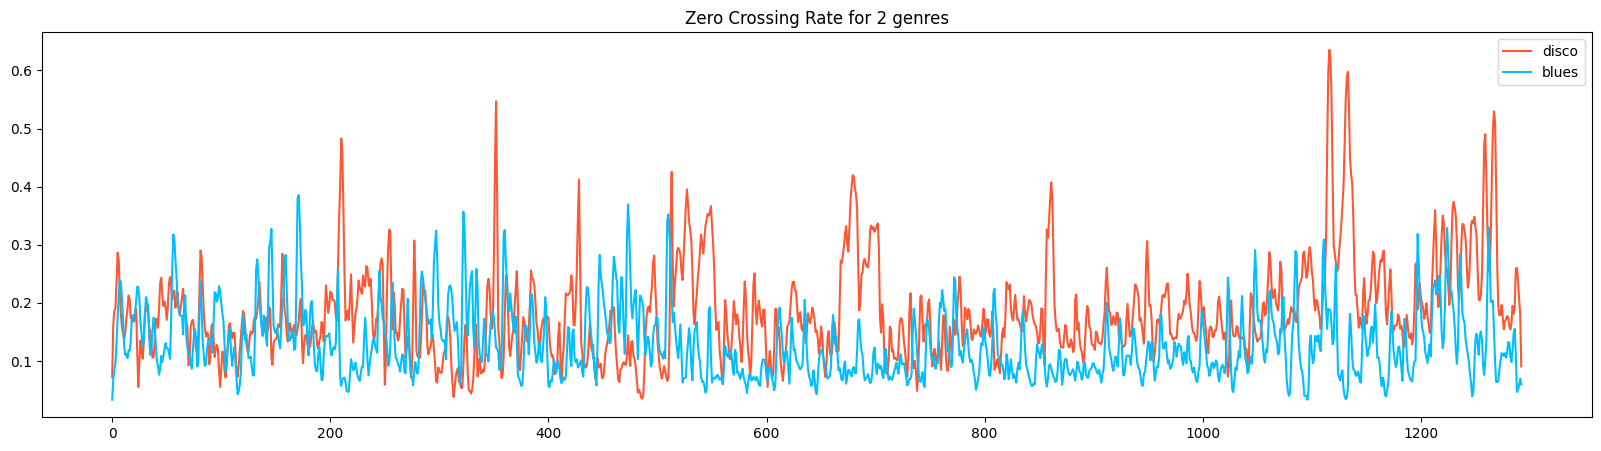

In [17]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    zcr = lb.feature.zero_crossing_rate(audio_y,frame_length=frame_size,hop_length=hop_size)[0]
    plt.plot( range( 0,len(zcr)),zcr ,color=color_codes[j] )
    j+=1
plt.title('Zero Crossing Rate for 2 genres')
plt.legend(random_genres)

In [18]:
## Tempo: Beats per minute

tempo = lb.feature.tempo( y=audio_y,sr= audio_sr,hop_length=hop_size )

In [16]:
## TIME-FREQUENCY DOMAIN 

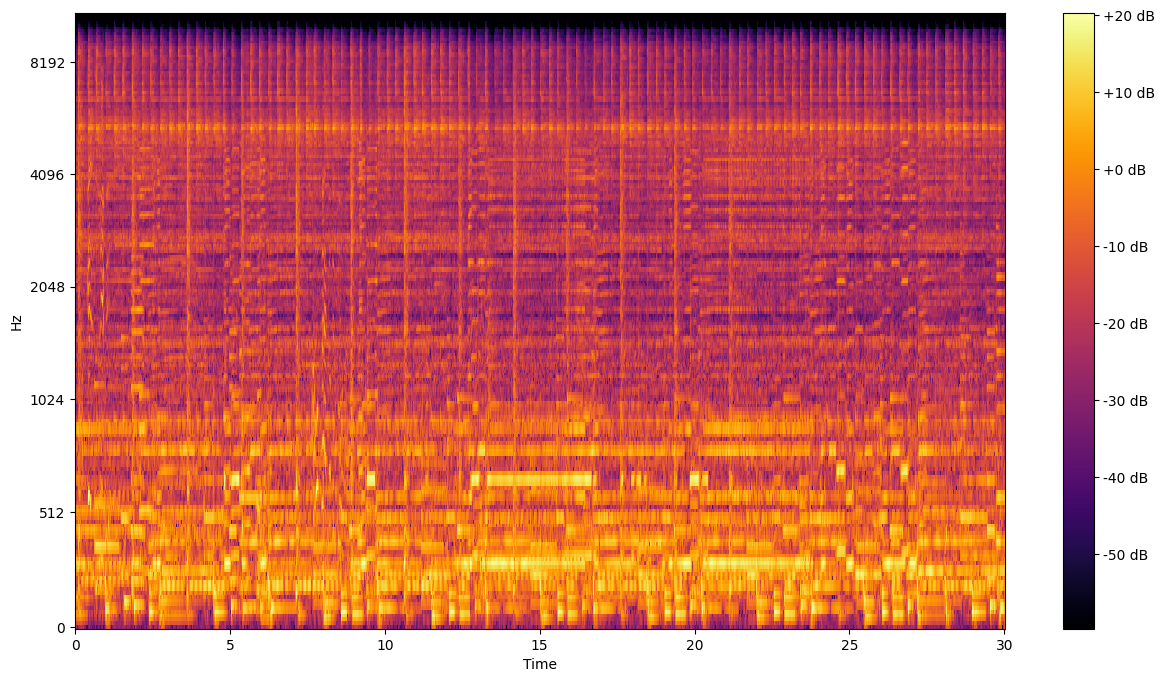

In [19]:
## We convert the audio file into a spectogram

audio_mel_spectogram = lb.feature.melspectrogram(y =audio_y, sr=audio_sr, n_fft=frame_size, hop_length=hop_size, n_mels=200)
audio_mel_spectogram = lb.power_to_db(audio_mel_spectogram)

plt.figure( figsize=(15,8) )
lb.display.specshow(
    audio_mel_spectogram,
    x_axis='time',
    y_axis='mel',
    sr = audio_sr,
    cmap= 'inferno'
)
plt.colorbar( format = "%+2.f dB" )

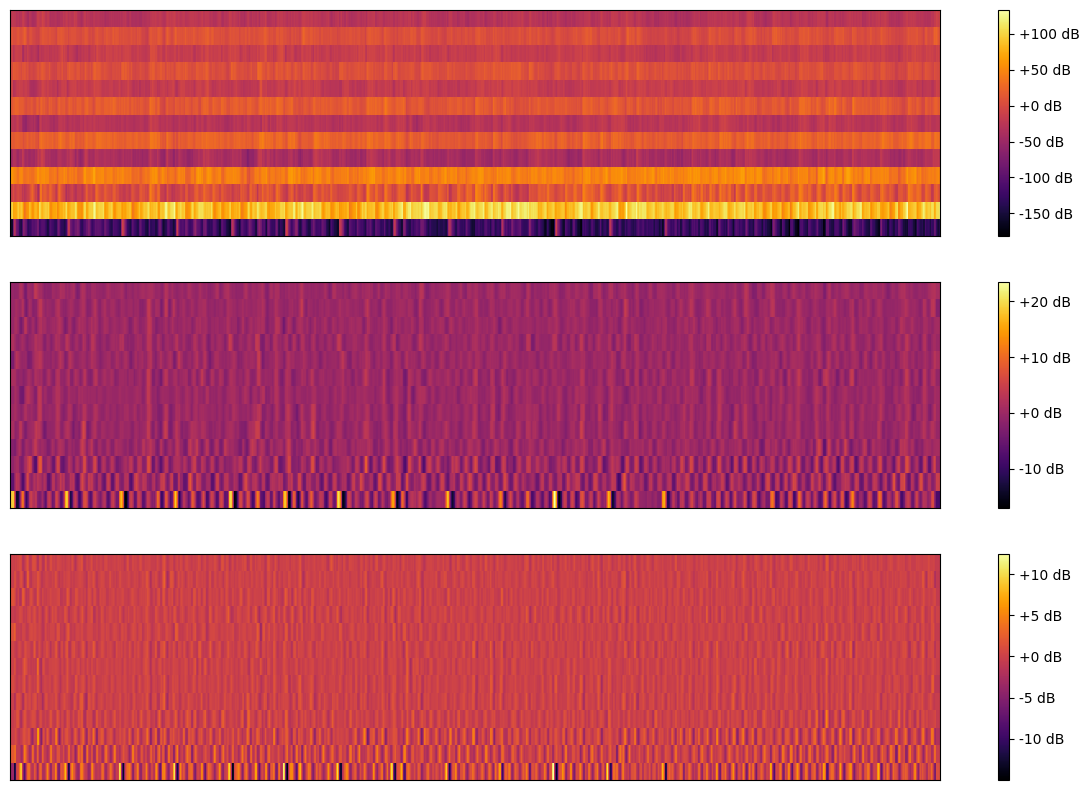

In [20]:
## MFCC - Mel Frequency Cepstral coefficients
## signal --> power spectogram --> log power spectogram -- ( cosine Transformation) --> Quefreancy-magnitude curve --> MFCC

mfcc = lb.feature.mfcc(y=audio_y,sr=audio_sr,n_mfcc=13)

## delta and delta-delta MFCC
mfcc_delta_1 = lb.feature.delta( mfcc, order=1 )
mfcc_delta_2 = lb.feature.delta( mfcc, order=2 )

plt.figure( figsize=(15,10) )
plt.subplot(311)
lb.display.specshow(
    mfcc,
    sr = audio_sr,
    cmap= 'inferno'
)
plt.colorbar( format = "%+2.f dB" )

plt.subplot(312)
lb.display.specshow(
    mfcc_delta_1,
    sr = audio_sr,
    cmap= 'inferno'
)
plt.colorbar( format = "%+2.f dB" )

plt.subplot(313)
lb.display.specshow(
    mfcc_delta_2,
    sr = audio_sr,
    cmap= 'inferno'
)
plt.colorbar( format = "%+2.f dB" )


mfcc_comprehensive = np.concatenate((mfcc,mfcc_delta_1,mfcc_delta_2))

In [19]:
## FREQUENCY DOMAIN FEATURES

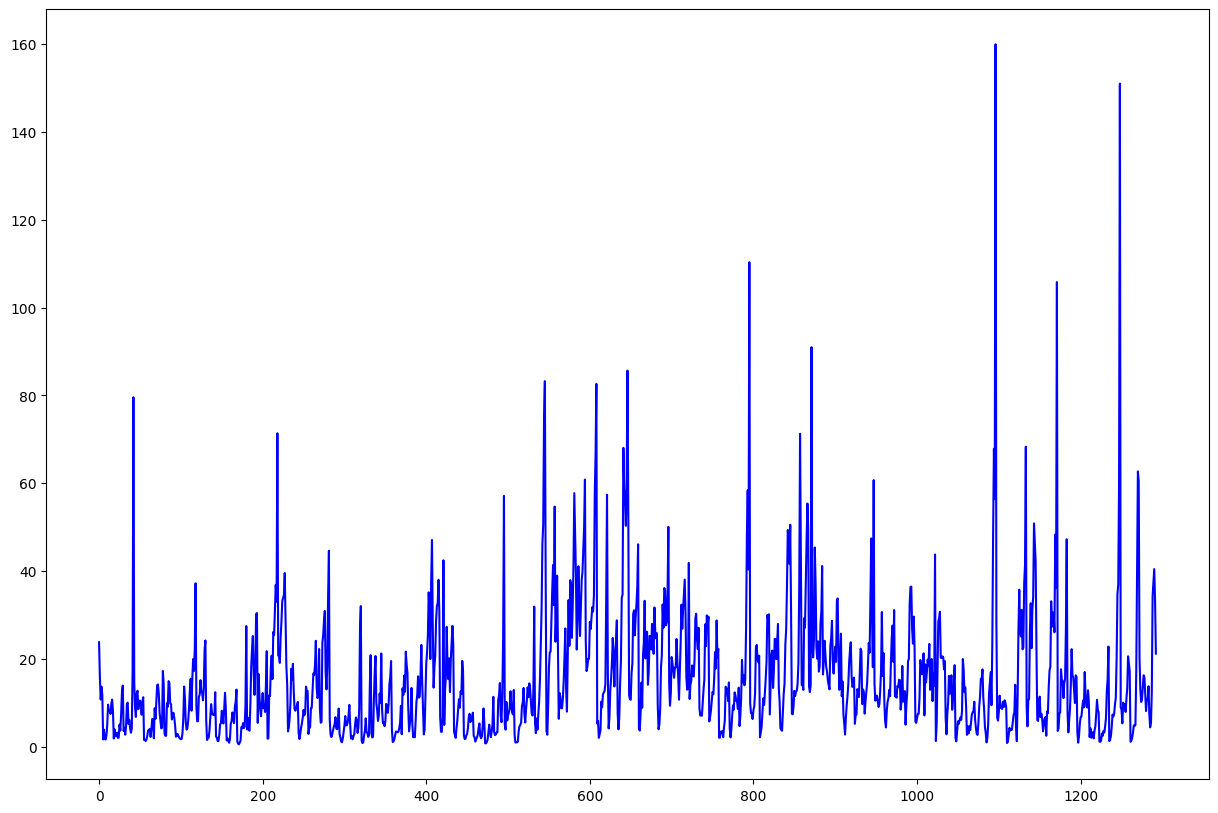

In [21]:
## BAND ENERGY RATIO
## Ratio of, energy below the split frequency and energy above the split frequency
## It is the specific to the frame

audio_stft = lb.stft(y=audio_y,n_fft=frame_size,hop_length=hop_size)

def split_frequency_bin(signal,split_freq,sr):
    freq_range = sr//2
    freq_delta_per_bin = freq_range/signal.shape[0]
    split_freq_bin =  np.floor( split_freq/ freq_delta_per_bin )
    return int(split_freq_bin)
    
def band_energy_ratio(signal,split_freq,sr):
    split_freq_bin = split_frequency_bin( signal, split_freq, sr )
    
    signal = np.abs(signal)**2 
    
    signal = signal.T
    ber = []
    for i in signal:
        low = np.sum( i[:split_freq_bin] )
        high = np.sum( i[split_freq_bin:] )
        ber.append( low/high )
    return np.array( ber )
     
ber = band_energy_ratio(audio_stft,split_freq,audio_sr)

plt.figure( figsize=(15,10) )
plt.plot( range(len(ber)), ber ,color='b' )
plt.show()
 

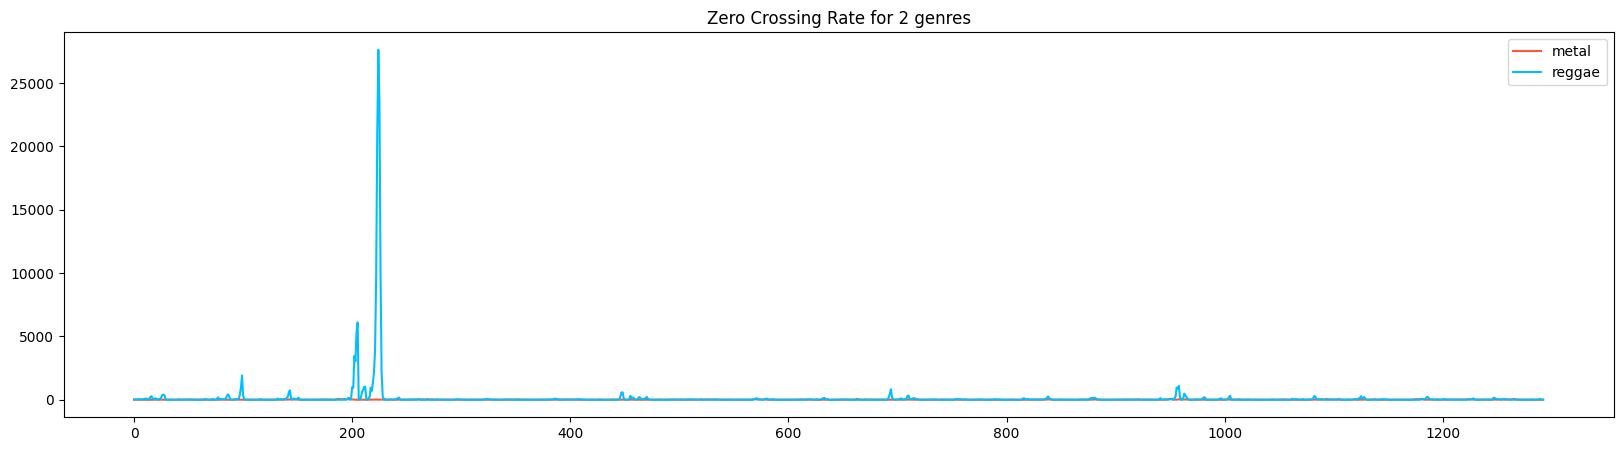

In [22]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    audio_stft = lb.stft(y=audio_y,n_fft=frame_size,hop_length=hop_size)
    ber = band_energy_ratio(audio_stft,split_freq,audio_sr)
    plt.plot( range( 0,len(ber)),ber ,color=color_codes[j] )
    j+=1
plt.title('Zero Crossing Rate for 2 genres')
plt.legend(random_genres)

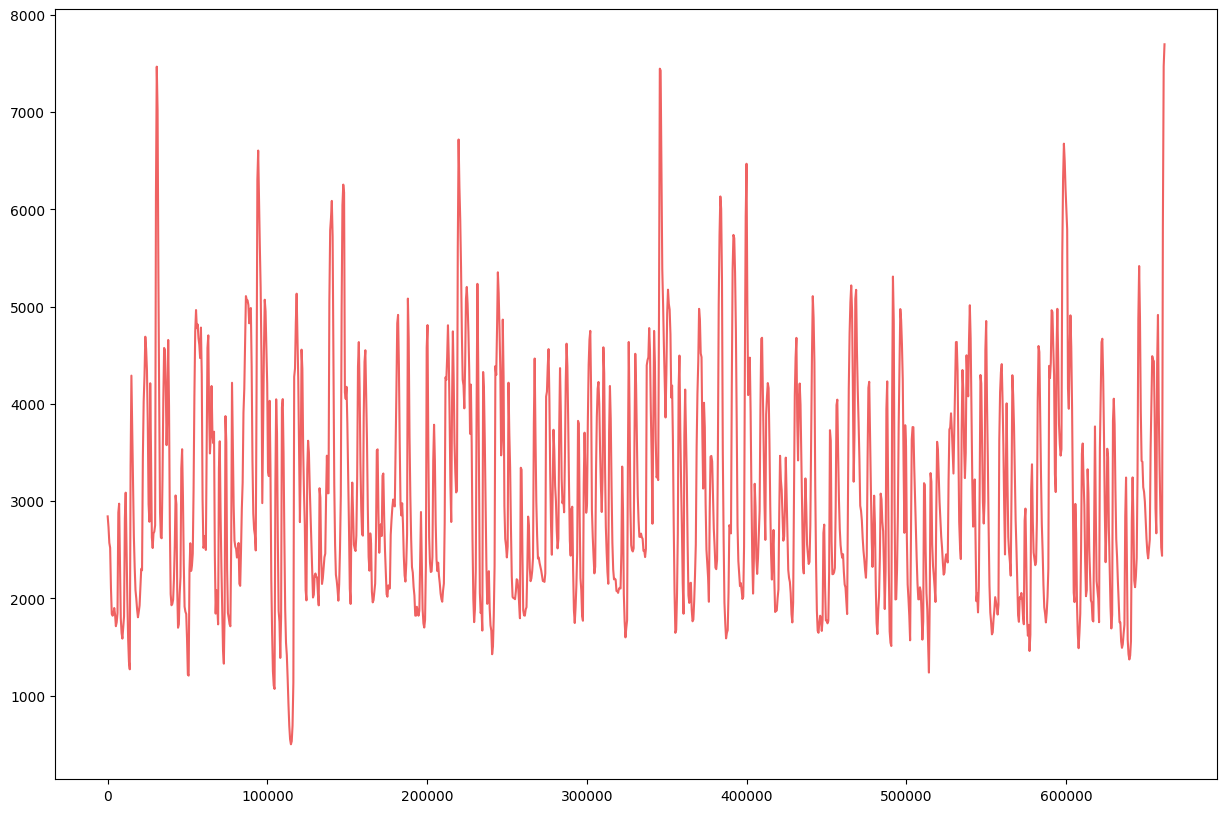

In [25]:
## SPECTRAL CENTROID
## weighted mean of the frequencies w.r.t amplitude present in the spectrum of that frame.
## f_1,f_2 ....  f_k
## a_1,a_2 .... a_k
## spectral centroid = +( f_i*a_i )/+( a_i )

spectral_centroid = lb.feature.spectral_centroid(y = audio_y,sr= audio_sr)[0]

plt.figure( figsize=(15,10) )
plt.plot( range( 0,audio_y.size+1,hop_size), spectral_centroid ,color='#EF6262' )

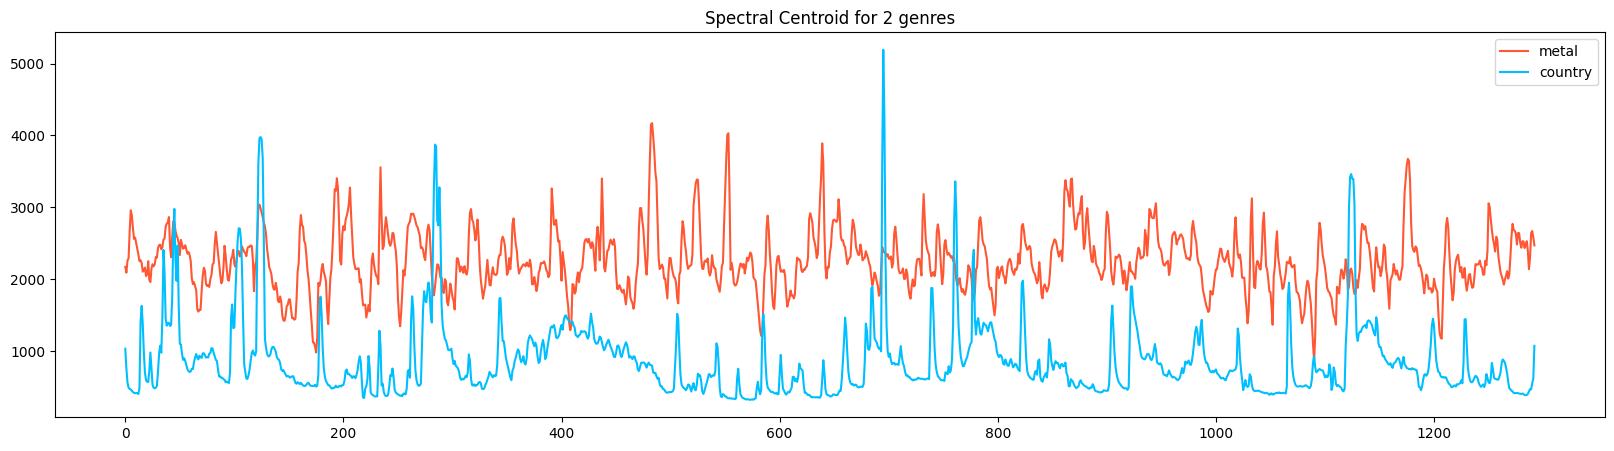

In [26]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_centroid = lb.feature.spectral_centroid(y = audio_y,sr= audio_sr)[0]
    plt.plot( range( 0,len(spectral_centroid)),spectral_centroid ,color=color_codes[j] )
    j+=1
plt.title('Spectral Centroid for 2 genres')
plt.legend(random_genres)

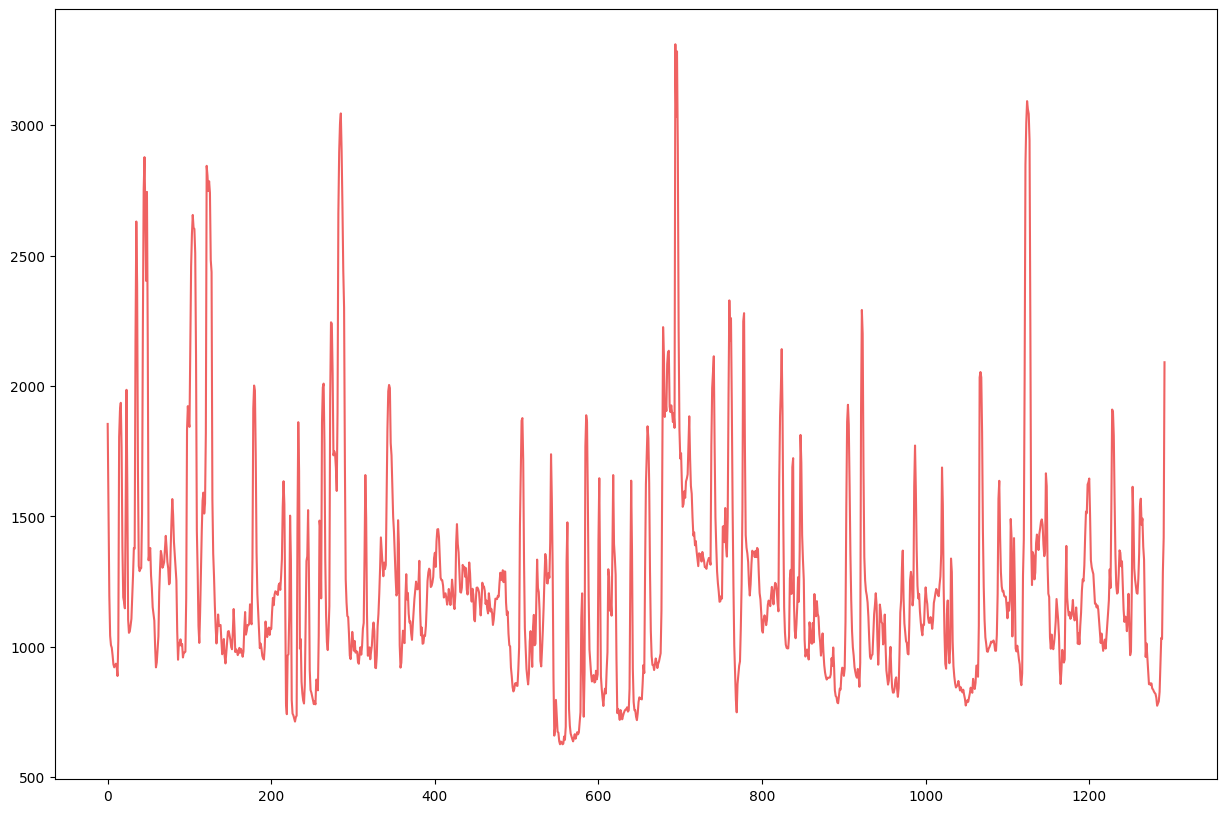

In [27]:
## SPECTRAL BANDWIDTH OR SPECTRAL SPREAD
## It is the weighted mean of the distance of the frequencies from the spectral centroid
## variance around the spectral centroid

spectral_bandwidth = lb.feature.spectral_bandwidth( y = audio_y,sr= audio_sr )[0]

plt.figure( figsize=(15,10) )
plt.plot( range(len(spectral_bandwidth)), spectral_bandwidth ,color='#EF6262' )

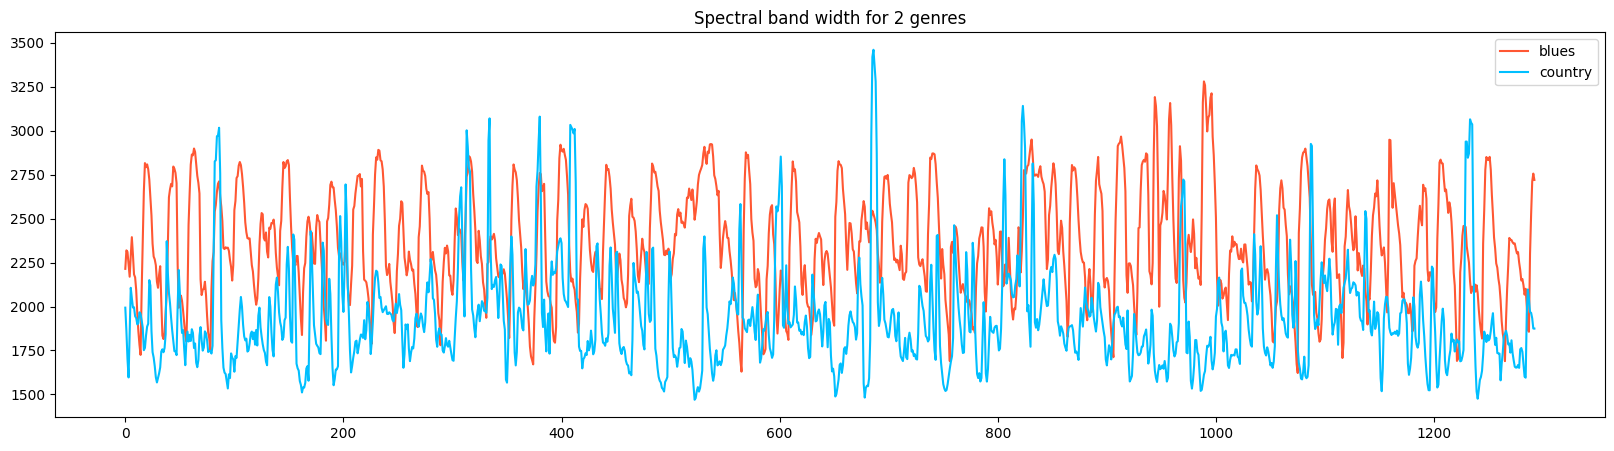

In [28]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_bandwidth = lb.feature.spectral_bandwidth( y = audio_y,sr= audio_sr )[0]
    plt.plot( range( 0,len(spectral_bandwidth)),spectral_bandwidth ,color=color_codes[j] )
    j+=1
plt.title('Spectral band width for 2 genres')
plt.legend(random_genres)

Text(0.5, 1.0, 'Spectral rolloff')

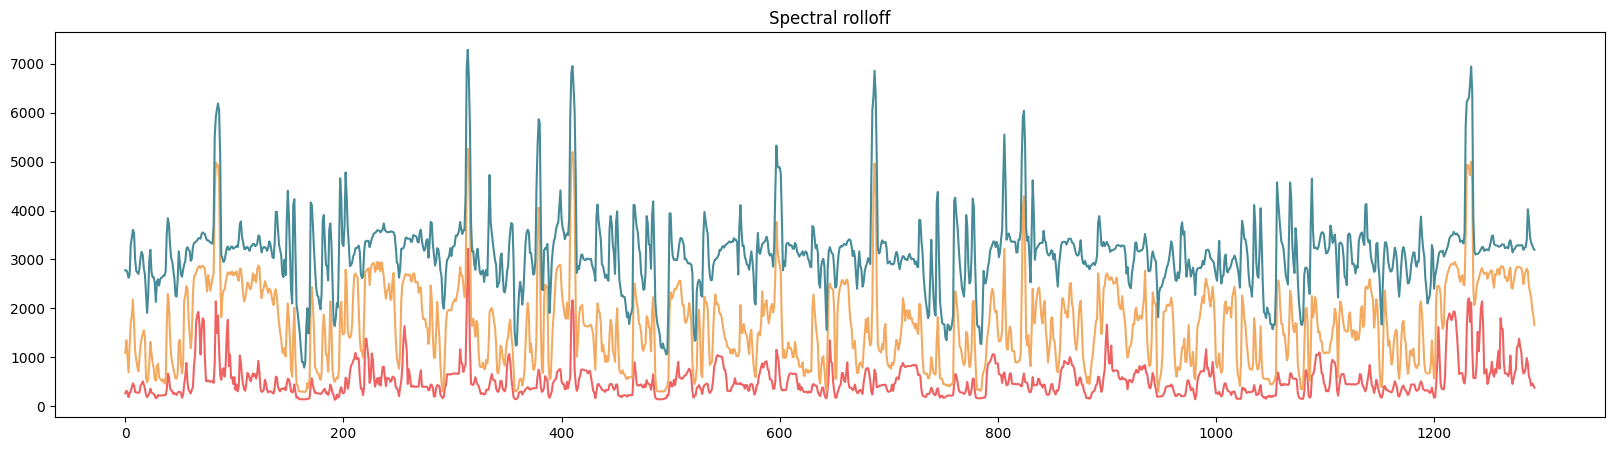

In [29]:
## Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

spectral_rolloff_25 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.25 )[0]
spectral_rolloff_50 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.50 )[0]
spectral_rolloff_75 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.75 )[0]

plt.figure( figsize=(20,5) )
plt.plot( range(len(spectral_rolloff_25)),spectral_rolloff_25 ,color='#EF6262' )
plt.plot( range(len(spectral_rolloff_50)),spectral_rolloff_50 ,color='#F3AA60' )
plt.plot( range(len(spectral_rolloff_75)),spectral_rolloff_75 ,color='#468B97' )
plt.title('Spectral rolloff')


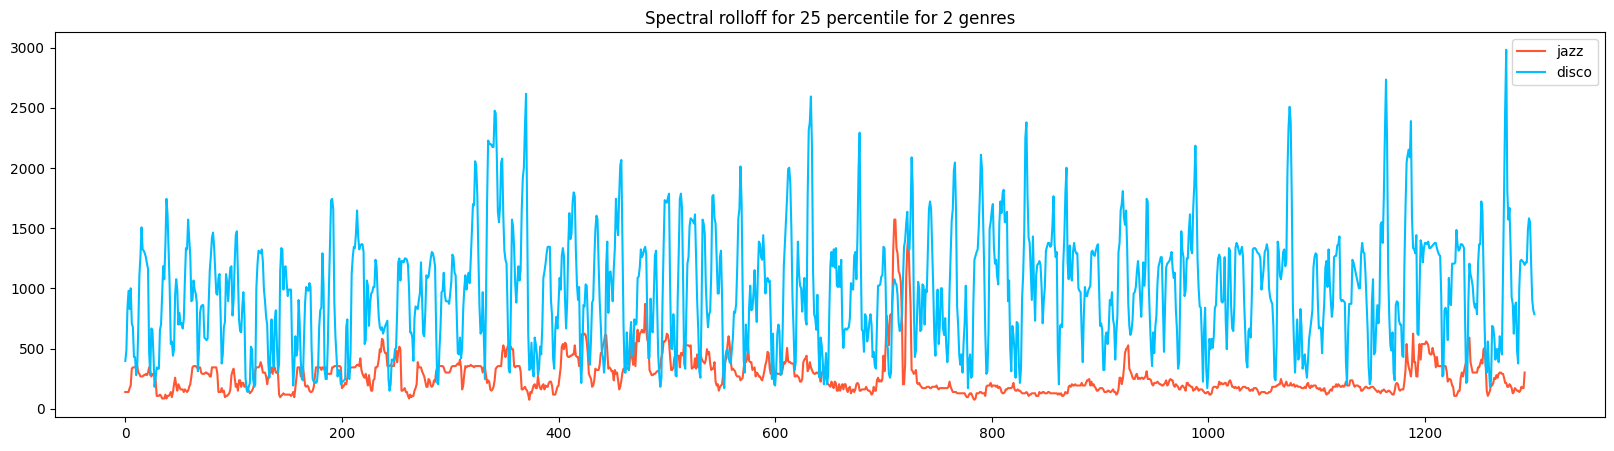

In [30]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_rolloff_25 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.25 )[0]
    plt.plot( range( 0,len(spectral_rolloff_25)),spectral_rolloff_25 ,color=color_codes[j] )
    j+=1
plt.title('Spectral rolloff for 25 percentile for 2 genres')
plt.legend(random_genres)

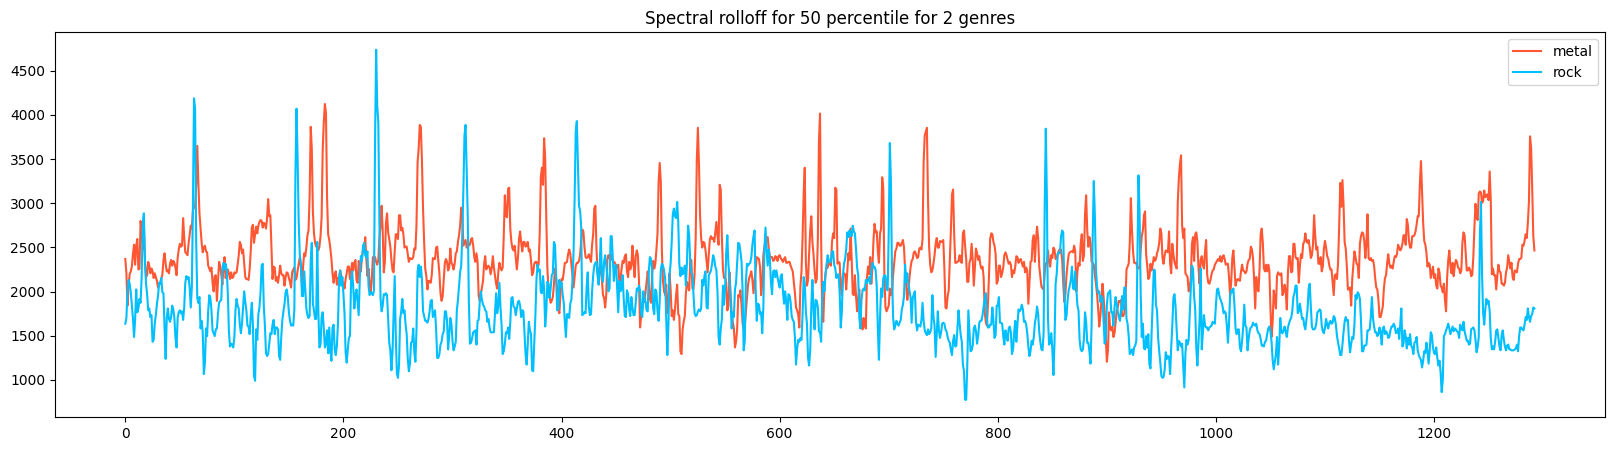

In [31]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_rolloff_50 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.5 )[0]
    plt.plot( range( 0,len(spectral_rolloff_50)),spectral_rolloff_50 ,color=color_codes[j] )
    j+=1
plt.title('Spectral rolloff for 50 percentile for 2 genres')
plt.legend(random_genres)

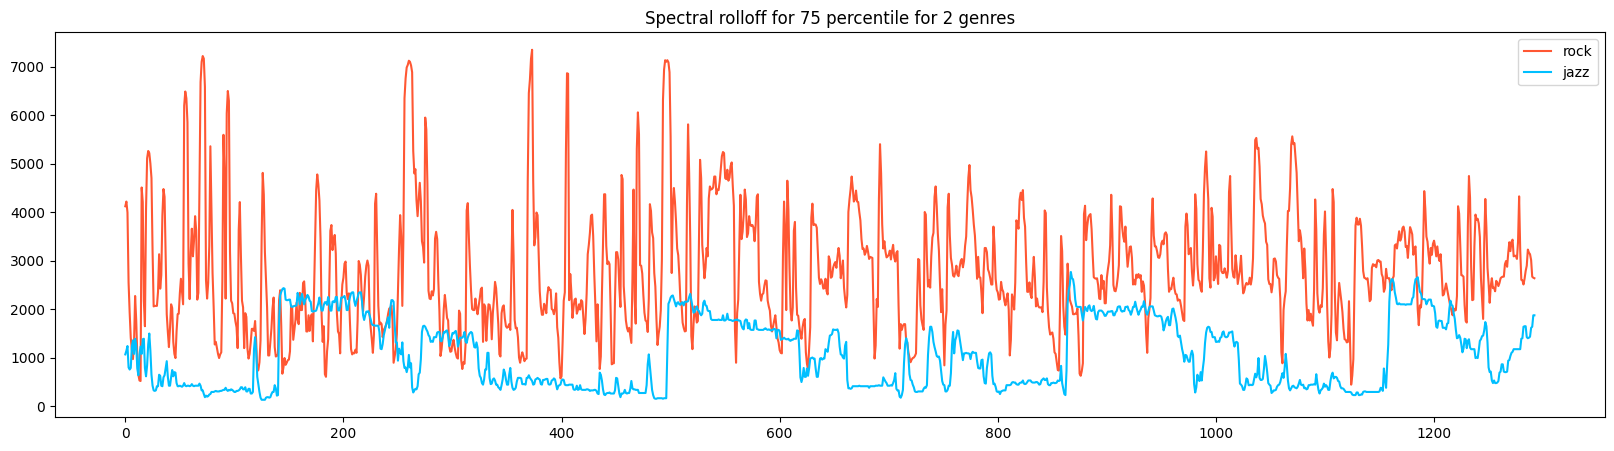

In [32]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_rolloff_75 = lb.feature.spectral_rolloff( y=audio_y,sr = audio_sr,roll_percent=0.75 )[0]
    plt.plot( range( 0,len(spectral_rolloff_75)),spectral_rolloff_75 ,color=color_codes[j] )
    j+=1
plt.title('Spectral rolloff for 75 percentile for 2 genres')
plt.legend(random_genres)

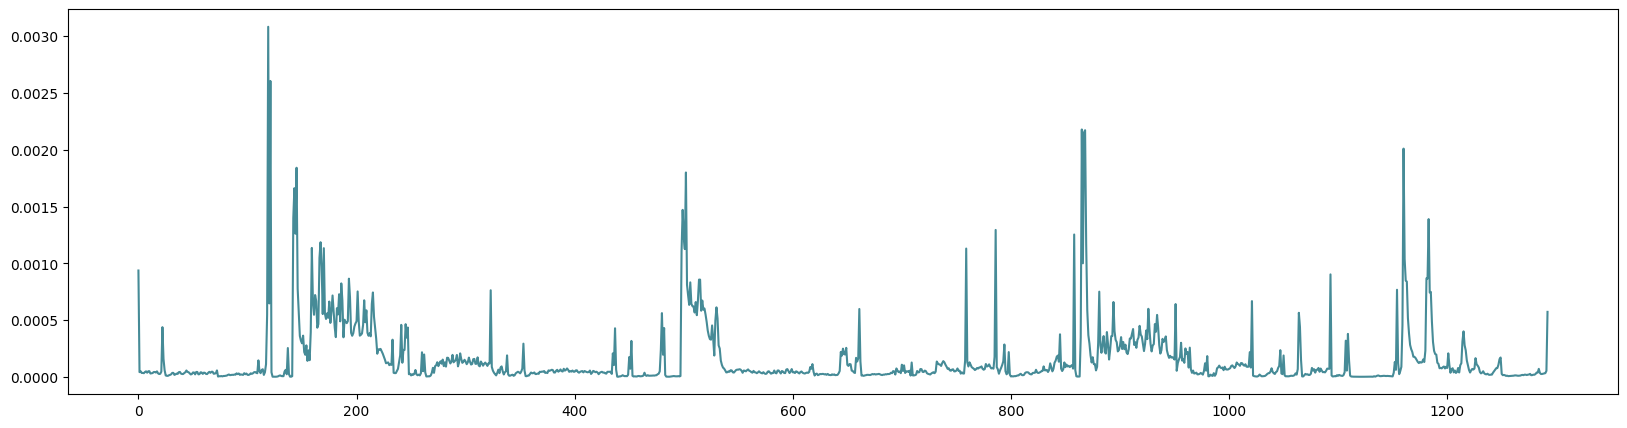

In [33]:
## SPECTRAL FLATNESS : It measures how different the given signal is different from white noise 
## spec_flat ~ 1.0 --> white noise, flat and smooth curve
## spec_flat ~ 0.0 --> a pure tone

spectral_flatness = lb.feature.spectral_flatness( y=audio_y,n_fft=frame_size,hop_length=hop_size )[0]

plt.figure( figsize=(20,5) )
plt.plot( range(len(spectral_flatness)),spectral_flatness ,color='#468B97' )


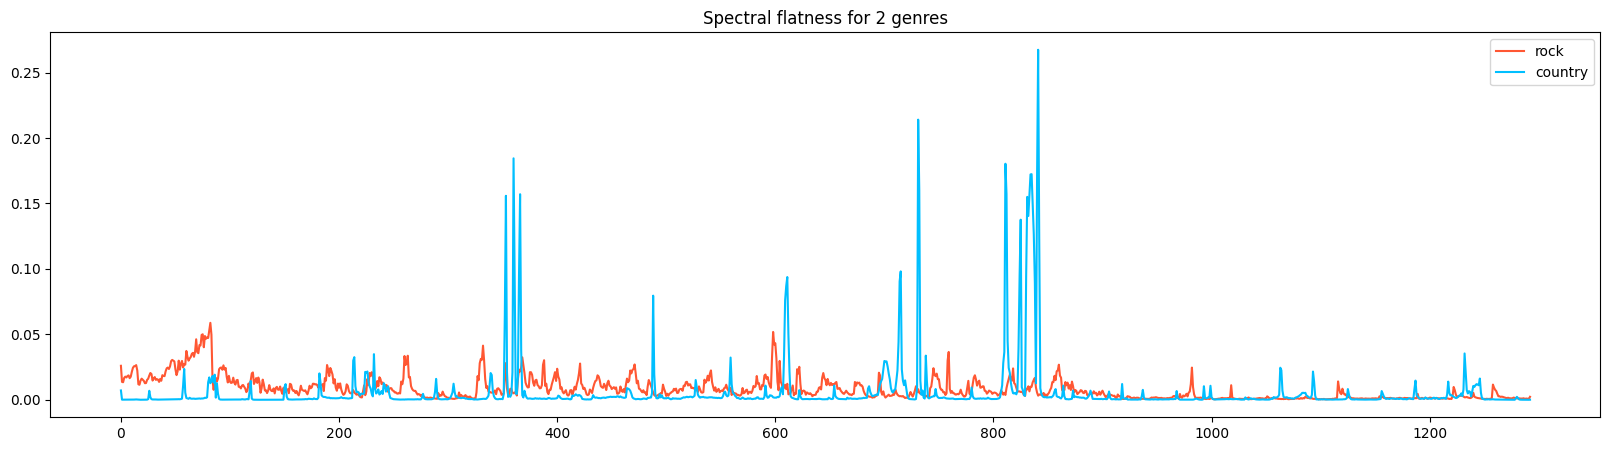

In [34]:
file_number = random.randint(a=0,b=99)
if file_number<10:
    file_number_str = "0" + str(file_number)
else:
    file_number_str = str(file_number)
j = 0
plt.figure( figsize=(20,5))
random_genres = random.sample(genres_list, k=2)
for genre in random_genres:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    spectral_flatness = lb.feature.spectral_flatness( y=audio_y,n_fft=frame_size,hop_length=hop_size )[0]
    plt.plot( range( 0,len(spectral_flatness)),spectral_flatness ,color=color_codes[j] )
    j+=1
plt.title('Spectral flatness for 2 genres')
plt.legend(random_genres)

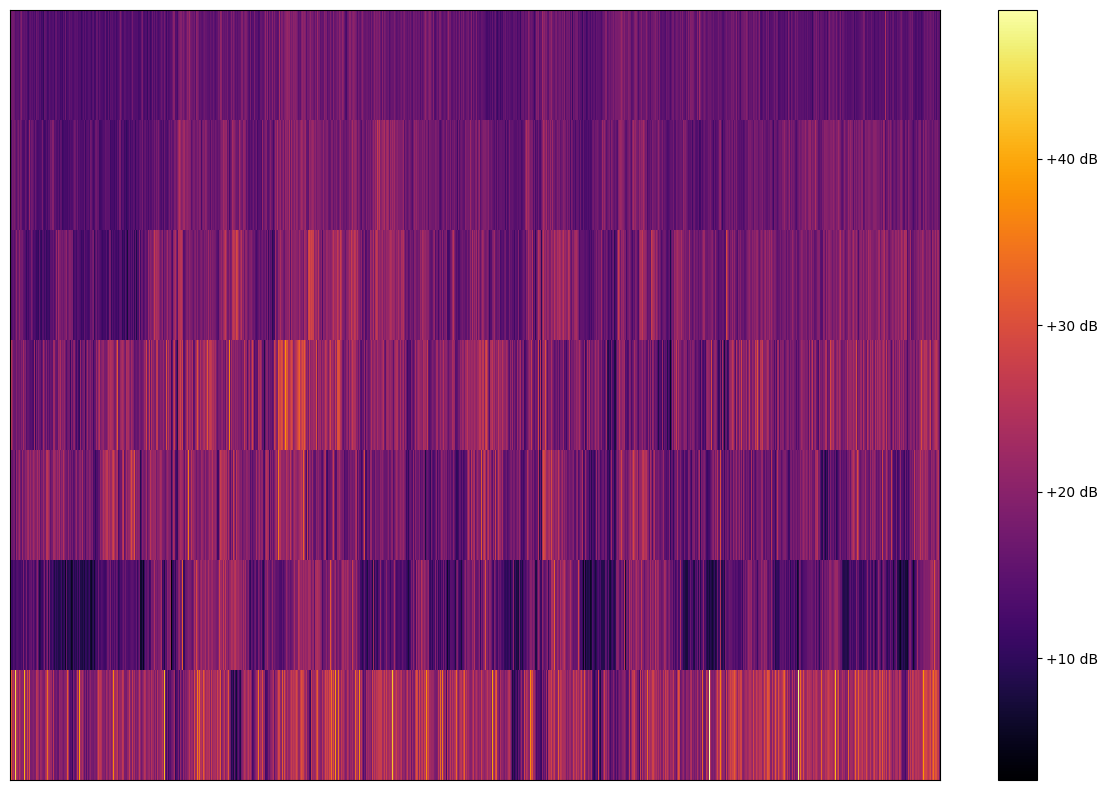

In [35]:
## SPECTRAL CONTRAST
## For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile 
## (peak energy) to that of the bottom quantile (valley energy)

spectral_contrast = lb.feature.spectral_contrast( y=audio_y,n_fft=frame_size,hop_length=hop_size )

plt.figure( figsize=(15,10) )
lb.display.specshow(
    spectral_contrast,
    sr = audio_sr,
    cmap = 'inferno'
)
plt.colorbar( format = "%+2.f dB" )


In [36]:
## PIPELINE 
## We have to give this function an audio file it should give the feature vector 

In [37]:
def extract_feature_vector( genre_name, genre_number, sr, frame_size, hop_length, split_frequency, contrast_bands, n_mfcc_coef):
    feature_list = []
    
    ## loading the audio file
    audio_path = 'Data/genres_original/' + genre_name + '/' + genre_name + '.' + str(genre_number).zfill(5) + '.wav'
    audio = lb.load(audio_path, sr= sr)[0]
    
    ## Time Domain features
    ## 1. Amplitude Envelope
    ae = amplitude_envelope(audio,frame_size ,hop_size)
    feature_list.append( mean_median_sd(ae,'AE') )
    
    ## 2. RMS Energy
    rms = lb.feature.rms(y=audio,frame_length=frame_size,hop_length=hop_size)[0]
    feature_list.append( mean_median_sd(rms,'RMS_Energy') )
    
    ## 3. Zero-Crossing Rate
    zcr = lb.feature.zero_crossing_rate(audio,frame_length=frame_size,hop_length=hop_size)[0]
    feature_list.append( mean_median_sd(zcr,'ZCR') )  
    
    ## 4. Tempo
    tempo = lb.feature.tempo( y=audio,sr=sr,hop_length=hop_size )
    feature_list.append({'Tempo':tempo[0]})
    
    ## Frequency Domain Features
    ## 5. Band Energy Ratio (BER)
    audio_stft = lb.stft(y=audio,n_fft=frame_size,hop_length=hop_size)
    ber = band_energy_ratio(audio_stft,split_frequency,sr)
    feature_list.append( mean_median_sd(ber,'BER') )
    
    ## 6. Spectral Centroid 
    spectral_centroid = lb.feature.spectral_centroid(y = audio,sr= sr)[0]
    feature_list.append( mean_median_sd(spectral_centroid,'Spectral_Centroid') )
    
    ## 7. Spectral Bandwidth
    spectral_bandwidth = lb.feature.spectral_bandwidth( y = audio,sr= sr )[0]
    feature_list.append( mean_median_sd(spectral_bandwidth,'Spectral_Bandwidth') )
    
    ## 8. Spectral Rolloff
    spectral_rolloff_25 = lb.feature.spectral_rolloff( y=audio,sr = sr,roll_percent=0.25 )[0]
    feature_list.append( mean_median_sd(spectral_rolloff_25, '25%ile_Spectral_Rolloff') )
    
    spectral_rolloff_50 = lb.feature.spectral_rolloff( y=audio,sr = sr,roll_percent=0.50 )[0]
    feature_list.append( mean_median_sd(spectral_rolloff_50, '50%ile_Spectral_Rolloff') )

    spectral_rolloff_75 = lb.feature.spectral_rolloff( y=audio,sr = sr,roll_percent=0.75 )[0]
    feature_list.append( mean_median_sd(spectral_rolloff_75, '75%ile_Spectral_Rolloff') )
    
    ## 9. Spectral Flatness
    spectral_flatness = lb.feature.spectral_flatness( y=audio,n_fft=frame_size,hop_length=hop_size )[0]
    feature_list.append( mean_median_sd(spectral_flatness,'Spectral_Flatness') )
    
    ## 10. Spectral Contrast
    spectral_contrast = lb.feature.spectral_contrast( y=audio,n_fft=frame_size,hop_length=hop_size,n_bands=contrast_bands)
    for i in range( contrast_bands+1 ):
        feature_list.append( mean_median_sd( spectral_contrast[i], 'spectral_contrast_band_'+str(i)) )
        
    ## TIME-FREQUENCY DOMAIN
    ## MFCC
    mfcc = lb.feature.mfcc(y=audio,sr=sr,n_mfcc=n_mfcc_coef)
    for i in range( n_mfcc_coef ):
        feature_list.append( mean_median_sd( mfcc[i], 'MFCC_'+str(i)) )
        
    ## MFCC-Delta_1
    mfcc_delta1 = lb.feature.delta(mfcc, order=1)
    for i in range( n_mfcc_coef ):
        feature_list.append( mean_median_sd( mfcc_delta1[i], 'MFCC_Delta1_'+str(i)) )
        
    ## MFCC-Delta_2
    mfcc_delta2 = lb.feature.delta(mfcc, order=2)
    for i in range( n_mfcc_coef ):
        feature_list.append( mean_median_sd( mfcc_delta2[i], 'MFCC_Delta2_'+str(i)) )
    
    feature_dictionary = { key:values for dict in feature_list for key, values in dict.items()}

    
    return feature_dictionary


In [1]:
def extract_spectograms(genre_name, genre_number, sr, frame_size, hop_length, n_mels=200):

    input_audio_path = 'Data/genres_original/' + genre_name + '/' + genre_name + '.' + str(genre_number).zfill(5) + '.wav'
    output_audio_path = 'Spectograms/' + genre_name + '/' +  genre_name + str(genre_number).zfill(5) + 'spectogram' + '.png'

    audio = lb.load(input_audio_path, sr= sr)[0]
    audio_mel_spectogram = lb.feature.melspectrogram(y =audio, sr=sr, n_fft=frame_size, hop_length=hop_length, n_mels=n_mels)
    audio_mel_spectogram = lb.power_to_db(audio_mel_spectogram)

    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    lb.display.specshow(audio_mel_spectogram,sr=sr,cmap='inferno')
    plt.savefig(output_audio_path)
    plt.close()

In [6]:
df_dictionary = {}
genre_names= ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for genre_name in genre_names:  
    start = time.time()
    for genre_number in range(100):
        extract_spectograms( genre_name,genre_number,sr,frame_size,hop_size )
    print(f'{genre_name} Done! - Time Taken {time.time()-start}')

blues Done! - Time Taken 32.57900595664978
classical Done! - Time Taken 34.425457239151
country Done! - Time Taken 31.476929187774658
disco Done! - Time Taken 31.756726026535034
hiphop Done! - Time Taken 32.634673833847046
jazz Done! - Time Taken 33.18852257728577
metal Done! - Time Taken 32.854501724243164
pop Done! - Time Taken 32.10208463668823
reggae Done! - Time Taken 32.94902515411377
rock Done! - Time Taken 33.94074487686157


In [7]:
df_dictionary = {}
genre_names= ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
index = 0 
for genre_name in genre_names:  
    start = time.time()
    for genre_number in range(100):
        feature_dictionary = extract_feature_vector(genre_name,genre_number,sr,frame_size,hop_size,split_freq,contrast_bands,n_mfcc_coeeficients)
        feature_dictionary['Label']=genre_name
        df_dictionary[index]=feature_dictionary
        index+=1
    print(f'{genre_name} Done! - Time Taken {time.time()-start}')

NameError: name 'extract_feature_vector' is not defined

In [39]:
audio_feature_df = pd.DataFrame(df_dictionary).transpose()

In [40]:
audio_feature_df.to_csv('audio_feature_df.csv')

In [41]:
audio_feature_df

AE_mean AE_median    AE_std RMS_Energy_mean RMS_Energy_median  \
0    0.329223  0.312683  0.140411        0.127936           0.12007   
1    0.249945     0.237  0.140322        0.093902          0.090106   
2    0.446409  0.444824  0.152131        0.173289          0.170162   
3    0.307396  0.281799  0.171544        0.139066          0.124992   
4    0.283178  0.246857  0.167908        0.089842          0.079655   
..        ...       ...       ...             ...               ...   
995  0.224247  0.215454  0.070344        0.079161          0.077647   
996  0.222605  0.222839  0.085128        0.075985          0.077359   
997  0.238081  0.230103  0.071012        0.081134          0.078617   
998  0.218577  0.233856  0.102356        0.083413          0.089776   
999  0.145792  0.132721  0.066558        0.054299          0.050857   

    RMS_Energy_std  ZCR_mean ZCR_median   ZCR_std       Tempo  ...  \
0         0.058543  0.082989    0.07729  0.031103  123.046875  ...   
1         0.052386  0.056083    0.04771   0.04136  107.666016  ...   
2         0.059419  0.076299   0.072519  0.035077  161.499023  ...   
3         0.083138  0.033301    0.02958  0.022458  172.265625  ...   
4         0.051131   0.10141   0.090649  0.047385  135.999178  ...   
..             ...       ...        ...       ...         ...  ...   
995       0.019843  0.089237   0.083015  0.038886  103.359375  ...   
996        0.02555  0.097665   0.097328  0.031859  117.453835  ...   
997       0.019928  0.121872   0.121183  0.044031  129.199219  ...   
998       0.035661  0.048777   0.041985  0.030572  112.347147  ...   
999       0.018756  0.076266   0.067748  0.047667  123.046875  ...   

    MFCC_Delta2_10_mean MFCC_Delta2_10_median MFCC_Delta2_10_std  \
0              0.004329              -0.00306           0.823881   
1              0.000426              0.001204           0.897858   
2             -0.005649              0.015335           0.832468   
3              -0.00342             -0.042519           0.841757   
4              0.001244             -0.008024           0.886439   
..                  ...                   ...                ...   
995            0.007509              0.003235            0.64701   
996            0.005193              0.007661            0.64198   
997             -0.0022             -0.001892           0.694026   
998            0.001323              0.001947            0.70772   
999            0.001427             -0.010225           0.661163   

    MFCC_Delta2_11_mean MFCC_Delta2_11_median MFCC_Delta2_11_std  \
0             -0.004537              0.008202           0.824711   
1             -0.006501              0.028411           0.848057   
2             -0.002225             -0.012533           0.857554   
3              0.001235              0.021445           0.734408   
4              0.001076              0.009076           0.955356   
..                  ...                   ...                ...   
995           -0.000769              0.006885           0.656388   
996            0.002911              0.003049           0.633558   
997           -0.005455              0.014153           0.695323   
998            0.001518             -0.003941           0.696265   
999           -0.004907             -0.003829           0.622788   

    MFCC_Delta2_12_mean MFCC_Delta2_12_median MFCC_Delta2_12_std  Label  
0             -0.004123             -0.021916           0.762399  blues  
1              0.000504             -0.015441           0.737971  blues  
2             -0.000031                0.0114           0.843827  blues  
3             -0.000736             -0.025702           0.769517  blues  
4              -0.00086             -0.008175           0.970001  blues  
..                  ...                   ...                ...    ...  
995            0.000907               0.00788           0.621447   rock  
996            0.004304              0.009151           0.649083   rock  
997         

#### EDA

#### For 2 random audio files from two different genres

#### EDA For Genrewise

In [43]:
df_extracted = pd.read_csv("audio_feature_df.csv")

In [44]:
df_extracted.shape

(1000, 171)

In [45]:
df_extracted.head()

Unnamed: 0   AE_mean  AE_median    AE_std  RMS_Energy_mean  \
0           0  0.329223   0.312683  0.140411         0.127936   
1           1  0.249945   0.237000  0.140322         0.093902   
2           2  0.446409   0.444824  0.152131         0.173289   
3           3  0.307396   0.281799  0.171544         0.139066   
4           4  0.283178   0.246857  0.167908         0.089842   

   RMS_Energy_median  RMS_Energy_std  ZCR_mean  ZCR_median   ZCR_std  ...  \
0           0.120070        0.058543  0.082989    0.077290  0.031103  ...   
1           0.090106        0.052386  0.056083    0.047710  0.041360  ...   
2           0.170162        0.059419  0.076299    0.072519  0.035077  ...   
3           0.124992        0.083138  0.033301    0.029580  0.022458  ...   
4           0.079655        0.051131  0.101410    0.090649  0.047385  ...   

   MFCC_Delta2_10_mean  MFCC_Delta2_10_median  MFCC_Delta2_10_std  \
0             0.004329              -0.003060            0.823881   
1             0.000426               0.001204            0.897858   
2            -0.005649               0.015335            0.832468   
3            -0.003420              -0.042519            0.841757   
4             0.001244              -0.008024            0.886439   

   MFCC_Delta2_11_mean  MFCC_Delta2_11_median  MFCC_Delta2_11_std  \
0            -0.004537               0.008202            0.824711   
1            -0.006501               0.028411            0.848057   
2            -0.002225              -0.012533            0.857554   
3             0.001235               0.021445            0.734408   
4             0.001076               0.009076            0.955357   

   MFCC_Delta2_12_mean  MFCC_Delta2_12_median  MFCC_Delta2_12_std  Label  
0            -0.004123              -0.021916            0.762399  blues  
1             0.000504              -0.015441            0.737971  blues  
2            -0.000031               0.011400            0.843827  blues  
3            -0.000736              -0.025702            0.769517  blues  
4            -0.000860              -0.008175            0.970001  blues  

[5 rows x 171 columns]

In [46]:
df_extracted_y = df_extracted["Label"]
df_extracted_x = df_extracted.drop("Label",axis = 1)

In [47]:
x_train_val,x_test,y_train_val,y_test = train_test_split(df_extracted_x,df_extracted_y,test_size = 0.12, stratify = df_extracted_y,random_state = 42)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size = 0.1,random_state = 42)

In [48]:
df_train = pd.concat([x_train,y_train],axis = 1)
df_train.head()

Unnamed: 0   AE_mean  AE_median    AE_std  RMS_Energy_mean  \
662         662  0.291815   0.273804  0.090893         0.096794   
441         441  0.479834   0.433533  0.244781         0.180831   
32           32  0.202787   0.173615  0.127361         0.100050   
527         527  0.109264   0.094696  0.059390         0.040031   
907         907  0.394416   0.347137  0.181796         0.155851   

     RMS_Energy_median  RMS_Energy_std  ZCR_mean  ZCR_median   ZCR_std  ...  \
662           0.094536        0.022628  0.137336    0.137405  0.036100  ...   
441           0.151768        0.117037  0.119371    0.111641  0.075152  ...   
32            0.085112        0.064621  0.039383    0.023855  0.060432  ...   
527           0.038177        0.017234  0.062705    0.062977  0.029611  ...   
907           0.145732        0.063545  0.047191    0.040076  0.034950  ...   

     MFCC_Delta2_10_mean  MFCC_Delta2_10_median  MFCC_Delta2_10_std  \
662             0.004044              -0.027913            0.795473   
441             0.000809               0.004126            0.924213   
32              0.008983              -0.012619            0.868351   
527             0.000652               0.019731            0.675533   
907             0.000499              -0.004241            0.777140   

     MFCC_Delta2_11_mean  MFCC_Delta2_11_median  MFCC_Delta2_11_std  \
662            -0.002218              -0.037088            0.734569   
441            -0.003409              -0.045658            0.942360   
32              0.022085               0.006818            0.825019   
527            -0.000168               0.006994            0.652204   
907             0.002488               0.029845            0.779148   

     MFCC_Delta2_12_mean  MFCC_Delta2_12_median  MFCC_Delta2_12_std   Label  
662             0.000472               0.024893            0.761342   metal  
441            -0.004905               0.033263            0.981339  hiphop  
32              0.006854               0.020032            0.765356   blues  
527            -0.001147              -0.009894            0.667573    jazz  
907             0.002855              -0.010872            0.639856    rock  

[5 rows x 171 columns]

In [49]:
total_null = df_train.isnull().sum()
missing_values_columns = [total_null.index[i] for i in range(len(total_null)) if total_null[i]!=0]
missing_values_columns
# No missing values in the data frame

[]

<BarContainer object of 10 artists>

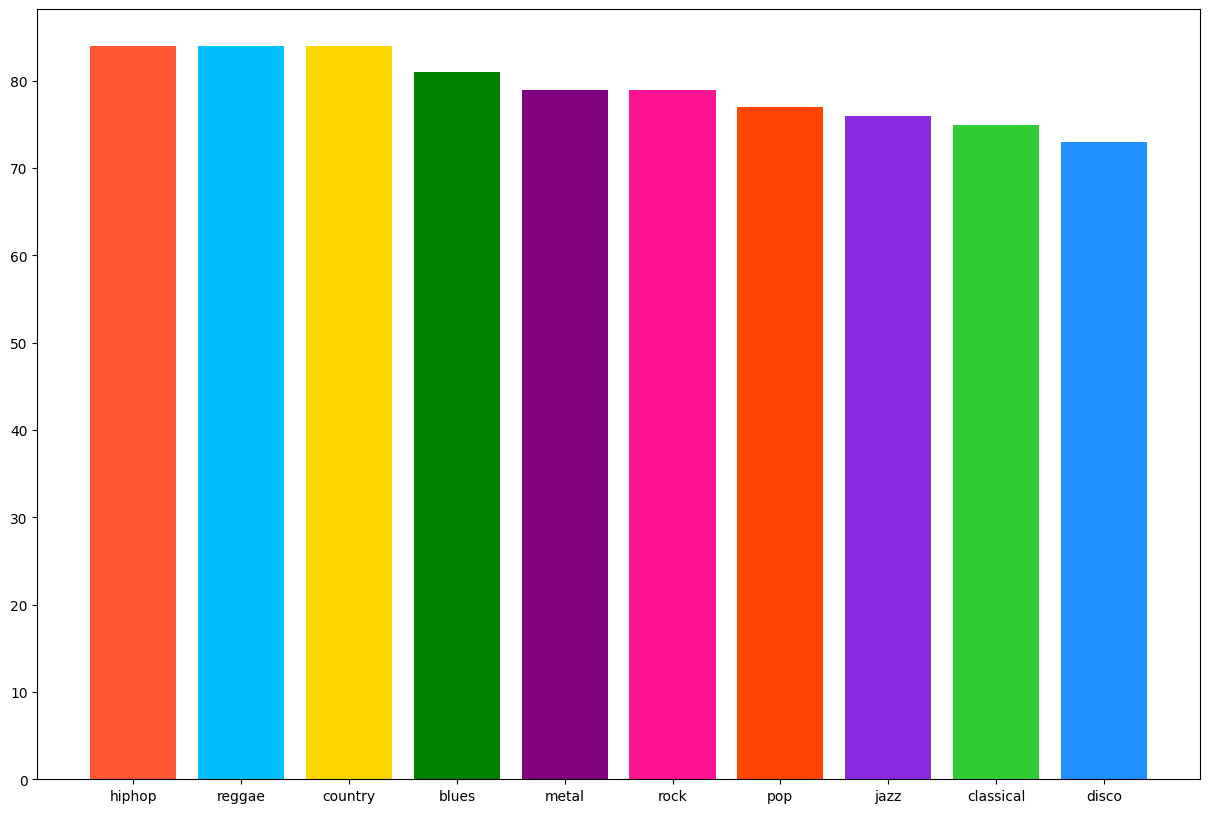

In [50]:
# Distribution of labels representation
class_distribution = df_train["Label"].value_counts()
plt.figure(figsize = (15,10))
plt.bar(class_distribution.index,class_distribution,color = color_codes)


#### Plots for Distribution of variables

#### 1) Tempo

Text(0.5, 1.0, 'Tempoes for different genres')

<Figure size 2000x500 with 0 Axes>

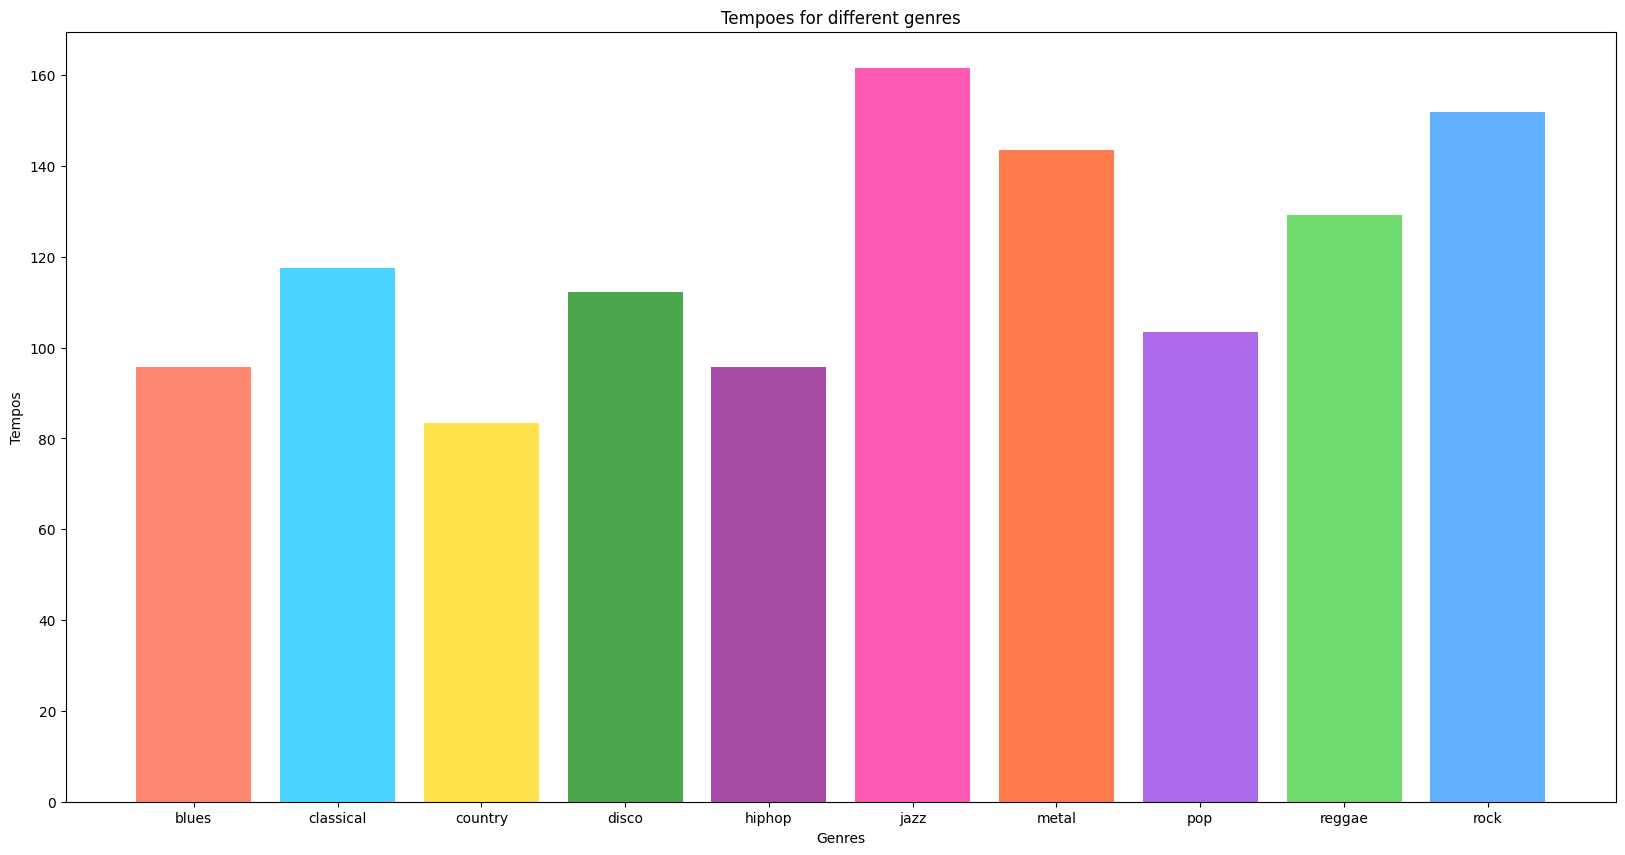

In [51]:
j=0
tempo = []
plt.figure( figsize=(20,5))

for genre in genres_list:
    audio_path = 'Data/genres_original/' + genre + '/' + genre + '.000' + file_number_str + ".wav"
    audio_y, audio_sr = lb.load(audio_path,sr=22050)
    tempo.append(lb.feature.tempo( y=audio_y,sr= audio_sr,hop_length=hop_size )[0])
plt.figure(figsize = (20,10))
plt.bar(genres_list, tempo,color= color_codes, alpha=0.7)
plt.xlabel('Genres')
plt.ylabel('Tempos')
plt.title('Tempoes for different genres')

#### 2) KDE Plot

In [52]:
def kdeplot(data,variable):
    sns.kdeplot(data=df_train, x='AE_mean', hue='Label')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('Kernel Density Plots for Each Label')
    return


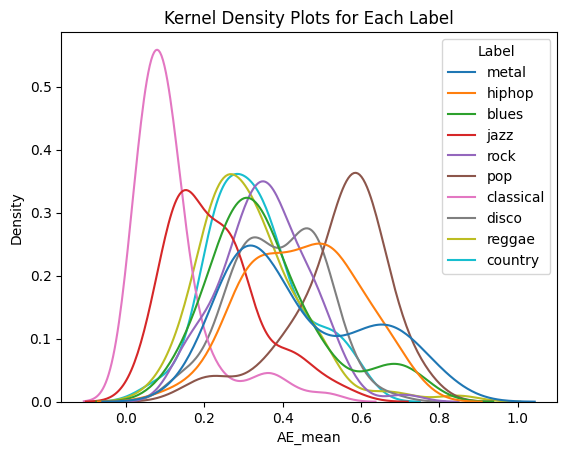

In [53]:
kdeplot(df_train,"AE_mean")

#### 3) BOX Plot

In [54]:
def boxplot(data,variable):
    plt.figure(figsize = (12,8))
    sns.boxplot(data=df_train, x='Label',y = variable)
    plt.xlabel('Genres')
    plt.ylabel(variable)
    plt.title('Box Plots for Each Label')
    plt.tight_layout()
    return

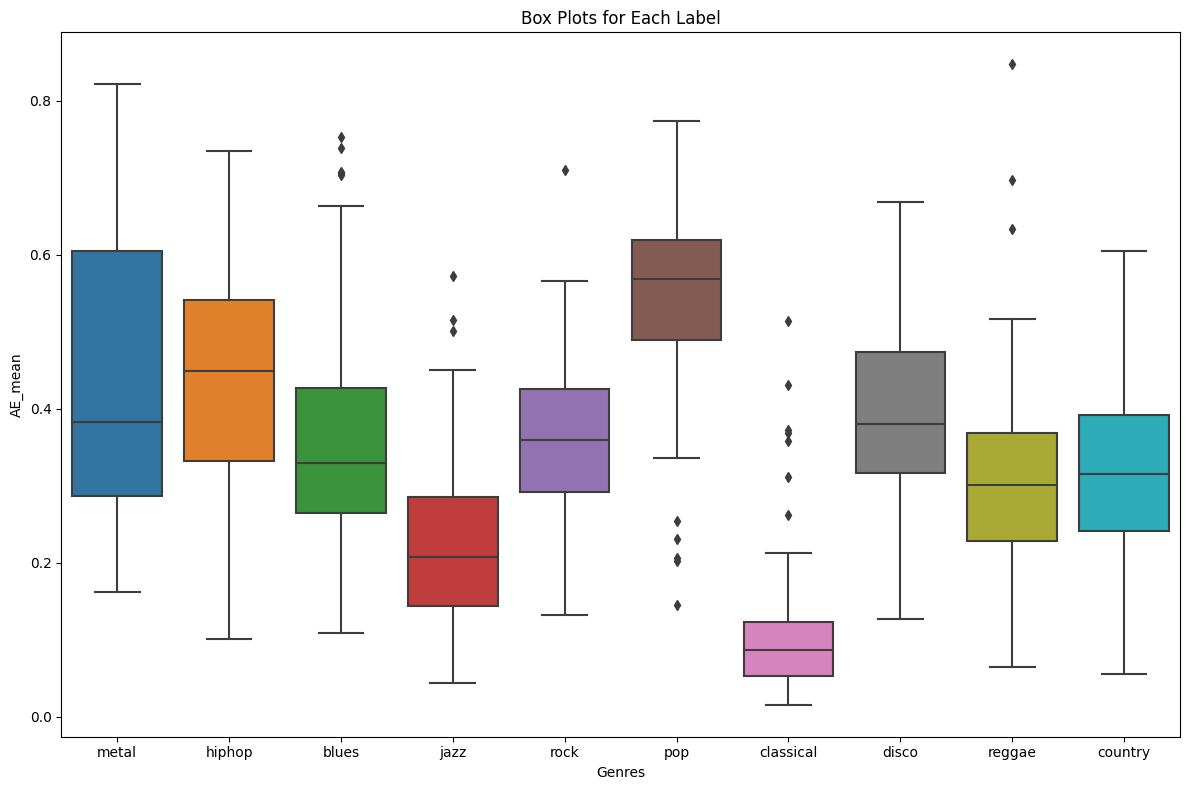

In [55]:
boxplot(df_train,"AE_mean")


#### 4) Violin Plot


In [56]:
def violinplot(data,variable):
    plt.figure(figsize = (12,8))
    sns.violinplot(data=df_train, x='Label',y = variable)
    plt.xlabel('Genres')
    plt.ylabel(variable)
    plt.title('Box Plots for Each Label')
    plt.tight_layout()
    return

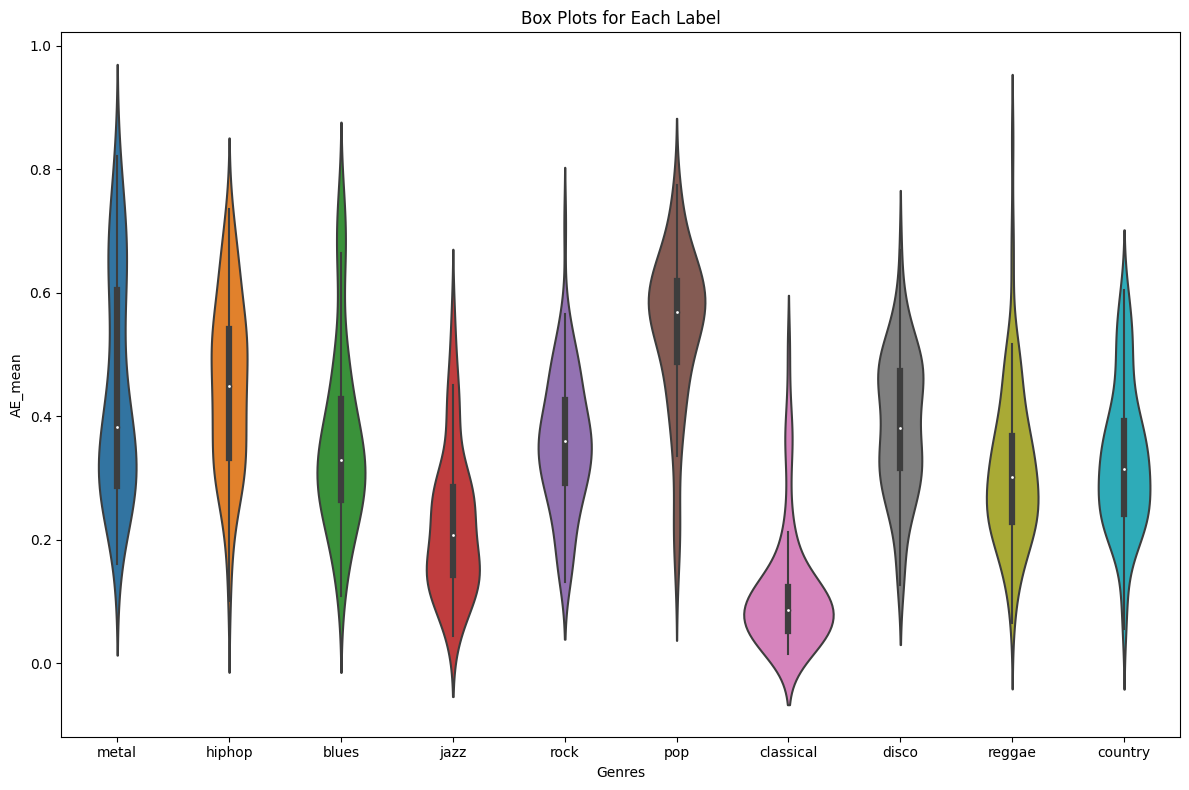

In [57]:
violinplot(df_train,"AE_mean")

#### mean of variable for all genres

In [54]:
def variable_mean_bar(data,variable,genres):
    means= []
    for i in genres:
        means.append(data[data['Label'] == i][variable].mean())
    plt.figure(figsize = (15,10))
    plt.bar(genres,means,color = color_codes)
    return


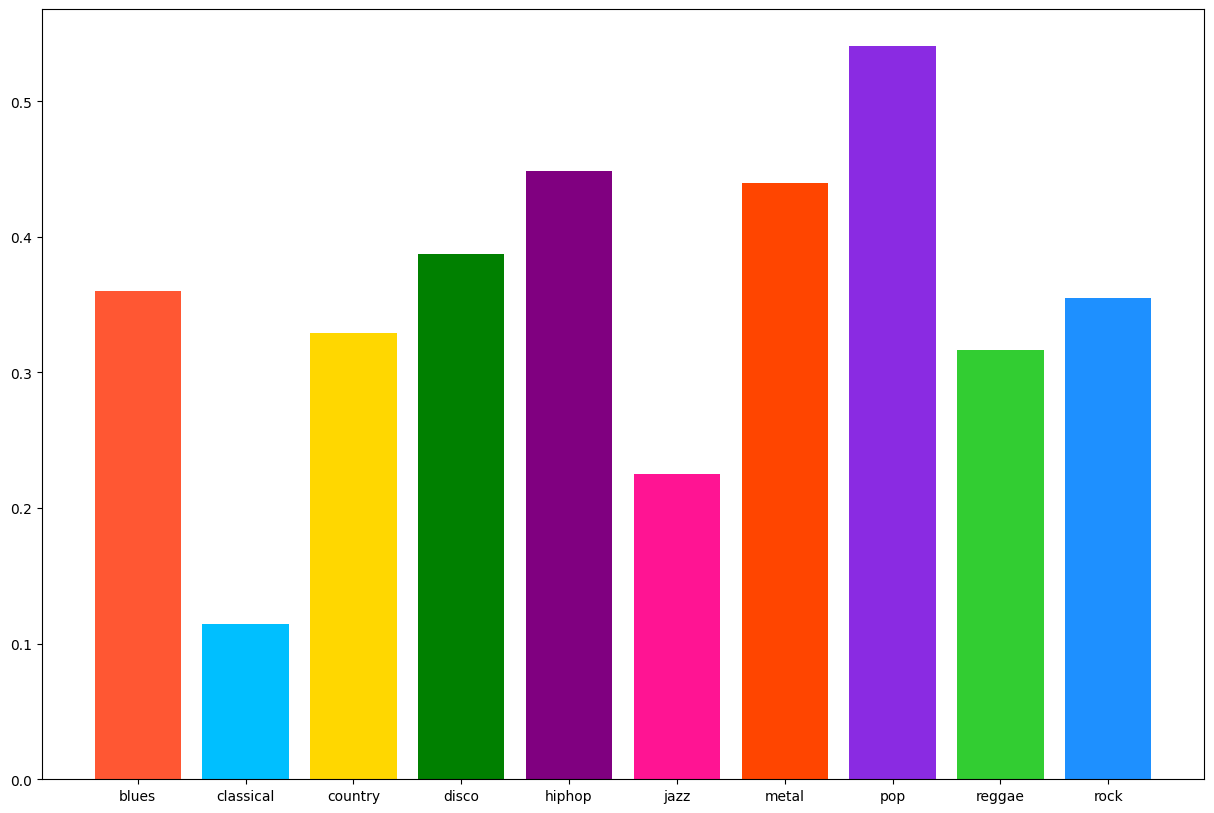

In [55]:
variable_mean_bar(df_train,'AE_mean',genres_list)

In [56]:
def variable_mean_dot(data,variable,genres):
    means= []
    for i in genres:
        means.append(data[data['Label'] == i][variable].mean())
    plt.figure(figsize = (15,10))
    plt.plot(genres,means,markersize=8, color='blue')
    plt.xlabel('Genres')
    plt.ylabel('Mean Values')
    plt.title('Comparison of Mean Values between Groups')
    plt.xticks(genres)
    plt.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid lines
    plt.tight_layout()
    plt.show()
    return


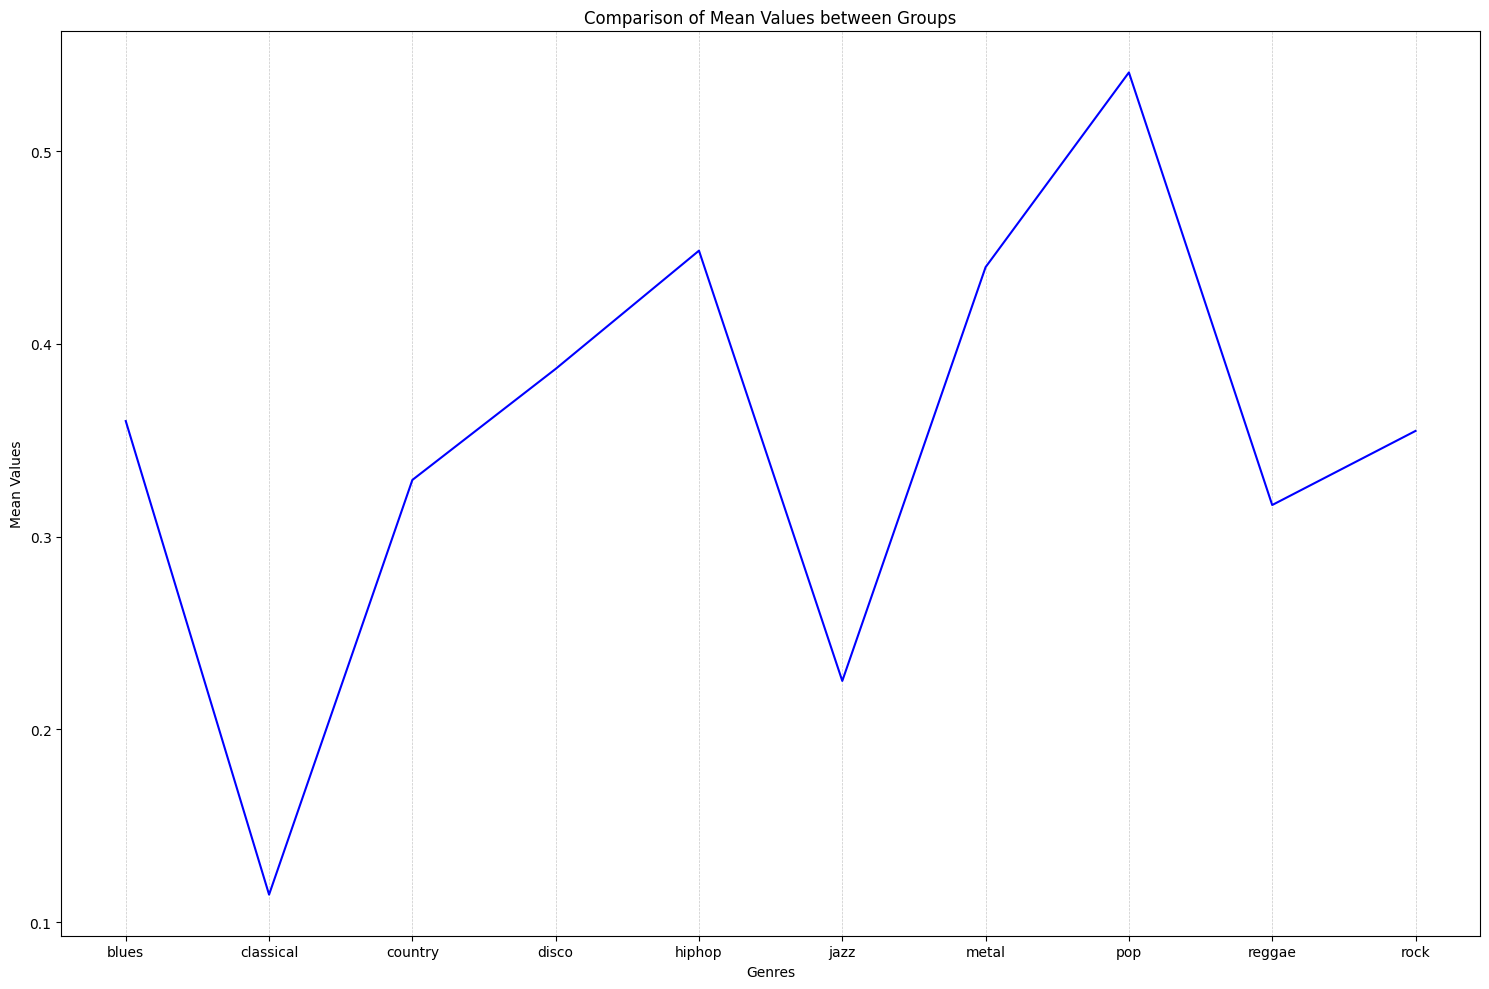

In [57]:
variable_mean_dot(df_train,'AE_mean',genres_list)

In [58]:
# Perform Shapiro-Wilk test
#Features which follow normally distribution genre wise
normal_feature = []
for variable in x_train.columns:
    count = 0
    for i in genres_list:
        statistic, p_value = stats.shapiro(df_train[df_train['Label'] == i][variable])
        # Interpret the results
        alpha = 0.05  # Significance level

        if p_value < alpha:
        # if atleast one feature distribution of a specific genre is not following normal distribution then we will conduct kruskal walleys test.
            count+=1
    if count==0:
        normal_feature.append(variable)


In [59]:
normal_feature
# All the individual genre distributions follow normality here.


['MFCC_Delta1_2_mean',
 'MFCC_Delta1_3_mean',
 'MFCC_Delta1_4_mean',
 'MFCC_Delta1_6_mean',
 'MFCC_Delta1_8_mean',
 'MFCC_Delta2_1_mean',
 'MFCC_Delta2_5_mean',
 'MFCC_Delta2_8_mean',
 'MFCC_Delta2_9_mean']

In [60]:
# Perform Kruskal-Wallis test
for variable in x_train.columns:
    groups = [group[1][variable].values for group in df_train.groupby('Label')]
    statistic, p_value = stats.kruskal(*groups)
    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print("No significant difference between." + variable)

No significant difference between.MFCC_Delta1_1_mean
No significant difference between.MFCC_Delta1_2_mean
No significant difference between.MFCC_Delta1_3_mean
No significant difference between.MFCC_Delta1_4_mean
No significant difference between.MFCC_Delta1_5_mean
No significant difference between.MFCC_Delta1_6_mean
No significant difference between.MFCC_Delta1_7_mean
No significant difference between.MFCC_Delta1_8_mean
No significant difference between.MFCC_Delta1_9_mean
No significant difference between.MFCC_Delta1_10_mean
No significant difference between.MFCC_Delta1_11_mean
No significant difference between.MFCC_Delta1_12_mean
No significant difference between.MFCC_Delta2_2_mean
No significant difference between.MFCC_Delta2_3_median
No significant difference between.MFCC_Delta2_9_mean


In [61]:
# In the above features there is no significant difference between genres
